# 🎬 Projet : Score Éditorial Anime
**Auteur :** Guillaume ZHU

**Date :** 2026-02-05

<br>

---

## 🎯 Contexte & Objectif
Une plateforme de streaming souhaite identifier rapidement des **"pépites"** (animés à forte valeur éditoriale) sans attendre les statistiques de visionnage.
Le but est de construire un **Score de Qualité** robuste pour mettre en avant des animés sûrs et éviter les séries trop irrégulières.

## ❓ Question métier centrale
*Comment identifier rapidement des animés "à forte valeur éditoriale" à partir de données limitées et imparfaites ?*

<br>

**Les Hypothèses à valider :**
* **H1 :** La note globale seule ne suffit pas.
* **H2 :** La régularité est un indicateur clé de qualité.
* **H3 :** Un score composite (Moyenne + Régularité) est meilleur pour le tri.
* **H4 :** Ce score permet une segmentation éditoriale fiable.

<br>
  
---

## 📊 Ma Structure d'Analyse (10 Étapes)

Je vais suivre la méthodologie suivante :

### 1. Mise en place
- [ ] **1.** Préparation de l'environnement (fichiers, dossier)

- [ ] **2.** Installation et import des librairies (`pandas`, `seaborn`, `matplotlib`)

- [ ] **3.** Import des données (CSV)

<br>

### 2. Compréhension et Nettoyage
- [ ] **4.** Compréhension des données (types, colonnes, compréhension du contenu)

- [ ] **5.** Nettoyage (traitement des valeurs manquantes, formatage date)

<br>

### 3. Analyse Exploratoire
- [ ] **6.** Analyse visuelle et recherche de modèles (Distributions, Corrélations)

    * *Validation de l'hypothèse H1 + H2*

<br>

### 4. Construction (Feature Engineering)
- [ ] **7.** Création des indicateurs de stabilité (`Écart`, `Régularité`, `Malus Régularité`)
    
- [ ] **8.** Création du `Score_Qualité` (Pondération Note + Régularité)
    

    <br>

### 5. Segmentation & Recommandations éditoriales
- [ ] **9.** Segmentation business ("Chef-d'œuvre", "Risqué", etc.)
- [ ] **10.** Reporting final : Top 10 recommandé et Bilan
    * *Validation de l'hypothèse H3 + H4*

    * *Notes méthodologiques et recommandations*

    * *Dashboard final de synthèse*

    <br>

---

## 1.0 Mise en place

### 1.1 Préparation de l'environnement 

In [375]:
# Installation des librairies dans l'environnement virtuel

%pip install pandas seaborn matplotlib openpyxl


[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### 1.2 Import des librairies (`pandas`, `seaborn`, `matplotlib`)

In [376]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches 

print("---> Import OK")

---> Import OK


### 1.3 Import des données CSV

In [377]:
df = pd.read_csv("assets/animes.csv")

df.head(5)

,Anime,Genre_Tags,Source,Nb_Episodes,Status,Studio,Date_Pub,Note_Globale,Note_Meilleur_Ep,Meilleur_Ep_Titre,Comm_Meilleur_Ep,Note_Pire_Ep,Pire_Ep_Titre,Comm_Pire_Ep,Comm_Saison_1,Comm_Saison_2,Comm_Saison_3
0,Naruto,Action / Shonen,Manga,220,Fini,Studio Pierrot,2002-10-03,8.4,9.6,Ep 133: Le cri des larmes,Animation fluide et combat viscéral incroyable.,5.8,Ep 26: Journal de Konoha (Recap),"Remplissage inutile, à sauter.","Arc Zabuza très émouvant, bases solides.",Examen Chuunin introduit une tension sombre.,Combat Lee vs Gaara légendaire.
1,Trigun,Sci-Fi / Action,Manga,26,Fini,Madhouse,1998-04-01,8.2,9.1,Ep 24: Le péché (Sin),"Conclusion tragique de l'arc Wolfwood, émotion...",6.5,Ep 13: Vash the Stampede (Recap),Résumé de mi-saison qui casse le rythme.,"Début western comique, Vash joue l'idiot.",Virage dramatique sombre avec les Gung-Ho Guns.,Révélations philosophiques sur le passé et Kni...
2,Dragon Ball Z,Action / Shonen,Manga,291,Fini,Toei Animation,1989-04-26,8.7,9.4,Ep 237: Le sacrifice d'un père,"Rédemption ultime de Vegeta, sommet émotionnel.",5.9,Ep 39: Amis ou ennemis (Fake Namek),"Filler ennuyeux sur une fausse planète, inutile.",Introduction des Saiyans et codes du Shonen po...,Aventure spatiale et tension tactique sur Namek.,"Transformation Super Saiyan iconique, combat é..."
3,Fullmetal Alchemist: Brotherhood,Aventure / Military,Manga,64,Fini,Bones,2009-04-05,9.1,9.6,Ep 63: De l'autre côté de la porte,"Sacrifice thématique parfait, conclusion magis...",6.3,Ep 27: Intermède (Recap),Episode récapitulatif cassant le rythme.,"Début effréné, traumatisme Nina Tucker marquant.",Complot politique et Mustang brille contre Lust.,"Ambiance militaire froide à Briggs, tension mo..."
4,Cowboy Bebop,Sci-Fi / Noir,Original,26,Fini,Sunrise,1998-04-03,8.8,9.7,Ep 26: The Real Folk Blues Pt.2,Fin poétique et iconique. Bang.,7.2,Ep 23: Boogie Woogie Feng Shui,Intrigue faible et rythme un peu mou.,Formation de l'équipe et choc visuel à l'église.,Exploration mélancolique du passé (Jupiter Jazz).,Confrontation fatale avec le Syndicat et Vicious.


---
## 2.0 Compréhension et nettoyage

### 2.1 Compréhension des données (types, colonnes, contenu)

In [378]:
# --- Informations générales ---
print("--- 1. INFORMATIONS GÉNÉRALES ---")
df.info()

--- 1. INFORMATIONS GÉNÉRALES ---
<class 'pandas.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Anime              73 non-null     str    
 1   Genre_Tags         73 non-null     str    
 2   Source             73 non-null     str    
 3   Nb_Episodes        73 non-null     int64  
 4   Status             73 non-null     str    
 5   Studio             73 non-null     str    
 6   Date_Pub           73 non-null     str    
 7   Note_Globale       73 non-null     float64
 8   Note_Meilleur_Ep   73 non-null     float64
 9   Meilleur_Ep_Titre  73 non-null     str    
 10  Comm_Meilleur_Ep   73 non-null     str    
 11  Note_Pire_Ep       73 non-null     float64
 12  Pire_Ep_Titre      73 non-null     str    
 13  Comm_Pire_Ep       73 non-null     str    
 14  Comm_Saison_1      73 non-null     str    
 15  Comm_Saison_2      73 non-null     str    
 16  Comm_

In [379]:
# --- Statistiques descriptif ---
print("\n--- 2. STATISTIQUES DESCRIPTIVES ---")
display(df.describe().round(2))


--- 2. STATISTIQUES DESCRIPTIVES ---


,Nb_Episodes,Note_Globale,Note_Meilleur_Ep,Note_Pire_Ep
count,73.00,73.00,73.00,73.00
mean,80.86,8.30,9.31,6.75
std,149.95,0.51,0.45,1.32
min,3.00,6.00,8.20,0.00
25%,24.00,8.10,9.10,6.30
50%,32.00,8.40,9.40,7.20
75%,74.00,8.60,9.70,7.50
max,1090.00,9.30,9.90,8.40


In [380]:
# --- Valeurs manquantes ---
print("\n--- 3. COMPTE DES VALEURS MANQUANTES (NaN) ---")
print(df.isnull().sum())


--- 3. COMPTE DES VALEURS MANQUANTES (NaN) ---
Anime                 0
Genre_Tags            0
Source                0
Nb_Episodes           0
Status                0
Studio                0
Date_Pub              0
Note_Globale          0
Note_Meilleur_Ep      0
Meilleur_Ep_Titre     0
Comm_Meilleur_Ep      0
Note_Pire_Ep          0
Pire_Ep_Titre         0
Comm_Pire_Ep          0
Comm_Saison_1         0
Comm_Saison_2         0
Comm_Saison_3        10
dtype: int64


#### ---> Constat sur la qualité des données
La compréhension révèle que le dataset est très propre. Les colonnes numériques (Notes, Nombre d'épisodes) sont complètes à 100%.

Seule la colonne `Comm_Saison_3` contient des valeurs manquantes. 

Comme notre objectif est de construire un score quantitatif, **cette donnée ne sera donc pas nécéssaire**. Nous allons donc conserver ces animés mais ignorer les colonnes commentaires pour le calcul du score.

### 2.2 Nettoyage

Pour garantir la fiabilité du score éditorial, nous appliquons les traitements suivants :

1.  **Optimisation** : Suppression des colonnes textuelles (Commentaires) inutiles pour le calcul du score. Données subjectives et peu fiables + pas assez de données différentes sur les commentaires pour faire une analyse texte.

2.  **Dédoublonnage** : Suppression des doublons basés sur le titre.

3.  **Formatage Temporel** : Conversion de la colonne `Date_Pub` en format temporel standard.


4.  **Filtrage des Aberrations** : Vérification des notes `Note_Globale` `Note_Meilleur_Ep` `Note_Pire_Ep` impossibles (inférieures à 0 ou supérieures à 10).

5.  **Nettoyage de sécurité pour les Studios** : Les studios peuvent être un critère utilisable pour le calcul de score. Il faut donc les nettoyer de manière légère (et par sécurité).



In [381]:
# --- 1. Optimisation (Suppression des colonnes commentaires) ---
colonnes_inutiles = ['Comm_Meilleur_Ep', 
    'Comm_Pire_Ep', 
    'Comm_Saison_1', 
    'Comm_Saison_2', 
    'Comm_Saison_3']

df = df.drop(columns = colonnes_inutiles, errors='ignore')

print("--- VÉRIFICATION ---")
for col in colonnes_inutiles:
    if col not in df.columns:
        print(f"La colonne '{col}' a bien été supprimée.")
    else:
        print(f"ATTENTION : La colonne '{col}' est toujours là !")

--- VÉRIFICATION ---
La colonne 'Comm_Meilleur_Ep' a bien été supprimée.
La colonne 'Comm_Pire_Ep' a bien été supprimée.
La colonne 'Comm_Saison_1' a bien été supprimée.
La colonne 'Comm_Saison_2' a bien été supprimée.
La colonne 'Comm_Saison_3' a bien été supprimée.


In [382]:
# --- 2. Dédoublonnage ---
# Stockage du nombre de lignes avant suppression
taille_avant = df.shape[0]

# Suppression
df = df.drop_duplicates(subset=['Anime'], keep='first')

# Différence pour vérifier
doublons_supprimes = taille_avant - df.shape[0]

print(f"--- RÉSULTAT ---")
print(f"Nombre de doublons supprimés : {doublons_supprimes}")
print(f"Nouvelle taille du dataset : {df.shape}")

--- RÉSULTAT ---
Nombre de doublons supprimés : 2
Nouvelle taille du dataset : (71, 12)


In [383]:
# --- 3. Formatage date ---
print("--- TYPE AVANT ---")
print(df['Date_Pub'].dtype)

# conversion en datetime
df['Date_Pub'] = pd.to_datetime(df['Date_Pub'], errors='coerce')

print("\n--- TYPE APRÈS ---")
print(df['Date_Pub'].dtype)

print("\n--- APERÇU ---")
display(df[['Anime', 'Date_Pub']].head())


--- TYPE AVANT ---
str

--- TYPE APRÈS ---
datetime64[us]

--- APERÇU ---


,Anime,Date_Pub
0,Naruto,2002-10-03
1,Trigun,1998-04-01
2,Dragon Ball Z,1989-04-26
3,Fullmetal Alchemist: Brotherhood,2009-04-05
4,Cowboy Bebop,1998-04-03


In [384]:
# --- 3. Filtrage des incohérences ---
## Application d'un filtre de validité sur les colonnes de notations
### Si la note n'est pas comprise entre 0 et 10, elle est considérée comme erreur et excluse

cols_notes = ['Note_Globale', 'Note_Meilleur_Ep', 'Note_Pire_Ep']

anomalies_trouvees = False

print("--- RECHERCHE DE NOTES INCOHÉRENTES ---")

for col in cols_notes:
    filtre_erreur = (df[col] < 0) | (df[col] > 10)
    
    lignes_erreurs = df[filtre_erreur]
    
    if len(lignes_erreurs) > 0:
        anomalies_trouvees = True
        print(f"\nAttention ! Colonne '{col}' : {len(lignes_erreurs)} valeurs suspectes détectées :")
        display(lignes_erreurs[['Anime', col]])
    else:
        print(f"Colonne '{col}' : Aucune anomalie détectée.")

if not anomalies_trouvees:
    print("Conclusion : Toutes les notes sont bien entre 0 et 10")

--- RECHERCHE DE NOTES INCOHÉRENTES ---
Colonne 'Note_Globale' : Aucune anomalie détectée.
Colonne 'Note_Meilleur_Ep' : Aucune anomalie détectée.
Colonne 'Note_Pire_Ep' : Aucune anomalie détectée.
Conclusion : Toutes les notes sont bien entre 0 et 10


---> Toutes les notes sont comprises entre 0 et 10, pas de nettoyage à faire niveau notes

In [385]:
# --- 5. NETTOYAGE DES STUDIOS ---

# Remplacer les vides
df['Studio'] = df['Studio'].fillna('Inconnu')

# Nettoyage de base (espaces avant/après)
df['Studio'] = df['Studio'].astype(str).str.strip()

# 3. Uniformiser les séparateurs
df['Studio'] = df['Studio'].str.replace(',', ' / ')

print("Studios nettoyés.")
print(f"Exemples de studios : {df['Studio'].unique()[:10]}")

Studios nettoyés.
Exemples de studios : <StringArray>
[   'Studio Pierrot',          'Madhouse',    'Toei Animation',
             'Bones',           'Sunrise',      'A-1 Pictures',
         'White Fox', 'TMS Entertainment',              '8bit',
    'Production I.G']
Length: 10, dtype: str



---
## 3. Analyse Exploratoire des Données

Avant de construire notre **Score Éditorial**, nous devons effectuer un audit complet du dataset. Cette étape de diagnostic vise à comprendre la structure des données pour calibrer nos futurs algorithmes.

Nous procédons en deux phases :
- **3.1 Analyse de la distribution**

- **3.2 Analyse des corrélations**


### 3.1 Analyse de la Distribution



Nous allons d'abord observer les variables une par une pour calibrer notre analyse :
* **3.1.1 Distribution des Notes :** Pour calibrer la **sévérité** de notre notation (la moyenne est-elle déjà haute ?).
* **3.1.2 Analyse des Formats :** Pour identifier la **durée standard** (film vs série fleuve) et exclure les formats non pertinents.
* **3.1.3 Typologie des Sources :** Pour comprendre l'**origine** majoritaire des scénarios (Manga, Original, Roman...).
* **3.1.4 Distribution Temporelle :** Pour situer le **contexte historique** (animés récents vs classiques) et détecter un éventuel biais de récence.
* **3.1.5 Distribution du Statut :** Pour évaluer la **fiabilité** des notes (œuvres terminées et stables vs œuvres en cours et volatiles).

    <br>

<hr style="width:15%; margin-left: 0;">

#### 3.1.1 Distribution des Notes (Calibrage)
Nous analysons la répartition des notes globales.
* **Objectif :** Identifier la moyenne du dataset pour savoir si les notes sont généralement hautes ou basses.

* **Question :** Est-ce une courbe en cloche ou un pic vers les notes hautes (surnotation) ?

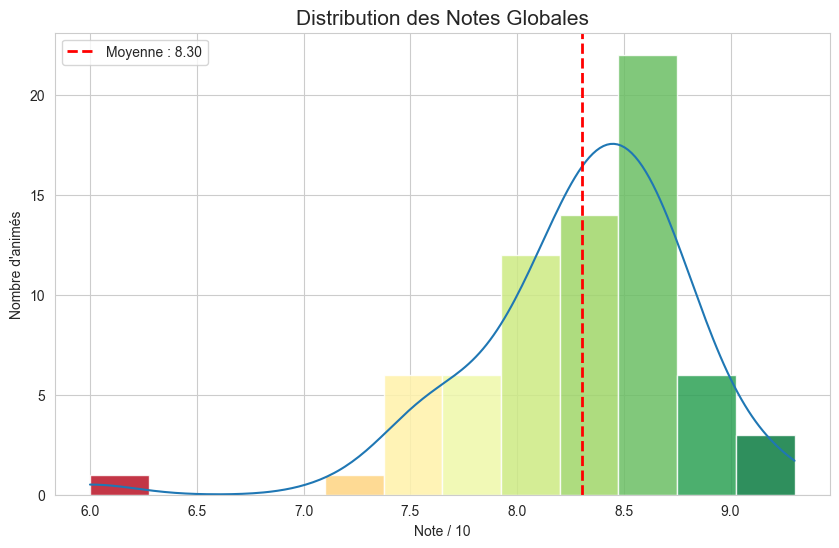

Moyenne exacte : 8.30 / 10
Médiane : 8.4 / 10


In [386]:
# --- 3.1.1 ANALYSE DES NOTES ---
plt.figure(figsize=(10, 6))

# 1. Histogramme de base
ax = sns.histplot(data=df, x='Note_Globale', kde=True, bins=12)

# 2. Application du dégradé (Rouge -> Jaune -> Vert)
norm = Normalize(vmin=df['Note_Globale'].min(), vmax=df['Note_Globale'].max())
cmap = plt.get_cmap('RdYlGn')

for patch in ax.patches:
    x_val = patch.get_x() + patch.get_width() / 2
    patch.set_facecolor(cmap(norm(x_val)))
    patch.set_alpha(0.85)

# 3. Ligne de moyenne
mean_val = df['Note_Globale'].mean()
plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Moyenne : {mean_val:.2f}')

plt.title('Distribution des Notes Globales', fontsize=15)
plt.xlabel('Note / 10')
plt.ylabel("Nombre d'animés")
plt.legend()
plt.show()

print(f"Moyenne exacte : {mean_val:.2f} / 10")
print(f"Médiane : {df['Note_Globale'].median()} / 10")

##### ---> Constat sur la distribution des notes

L'analyse de l'histogramme révèle trois informations cruciales pour notre futur algorithme :

1.  **Une Baseline très élevée (8.30 / 10)** :
    La moyenne n'est pas à 5 (neutre) ni à 7 (bon), mais à **8.30**.
    * *Interprétation :* Nous sommes face à une sélection de "Top Tiers", de favoris ou de notations généreuses.
    
    * *Conséquence :* Pour notre score, un animé noté **7/10** devra être traité comme un score négatif, car il est nettement en dessous du standard de notation de ce fichier.
    
    <br>

2.  **Une distribution décalée à droite** :
    La courbe est écrasée vers la droite. La majorité des animés se situent entre 8 et 10. Cela signifie que l'algorithme aura du mal à différencier les "Bons" des "Excellents" car les notes sont très serrées en haut du classement.

    <br>

3.  **Zone vide (6.25 - 7.10)** :
    On observe une zone vide entre les notes basses (~6) et les notes hautes (>7.1).
    Cela suggère un effet de seuil : les animés sont soit sanctionnés, soit validés, sans milieu de gamme.

`⭕️ Décision stratégique :
Traduire cette générosité par une hausse du niveau d'exigence des catégories pour la segmentation finale.`

<br>
<hr style="width:15%; margin-left: 0;">

#### 3.1.2 Analyse des Formats (Durée)

Nous analysons ici la longueur des œuvres (`Nb_Episodes`).
Cette étape permet de détecter le Standard de Format du dataset.

* **Le problème potentiel :** Comparer un film (1 épisode) à une série longue (500+ épisodes) est difficile. `👀 coucou one piece`

* **La visualisation :** La majorité des animés faisant moins de 25 épisodes, nous allons faire un **zoom** sur les séries de moins de 100 épisodes pour voir les standards (saisons de 12 vs 24 épisodes).

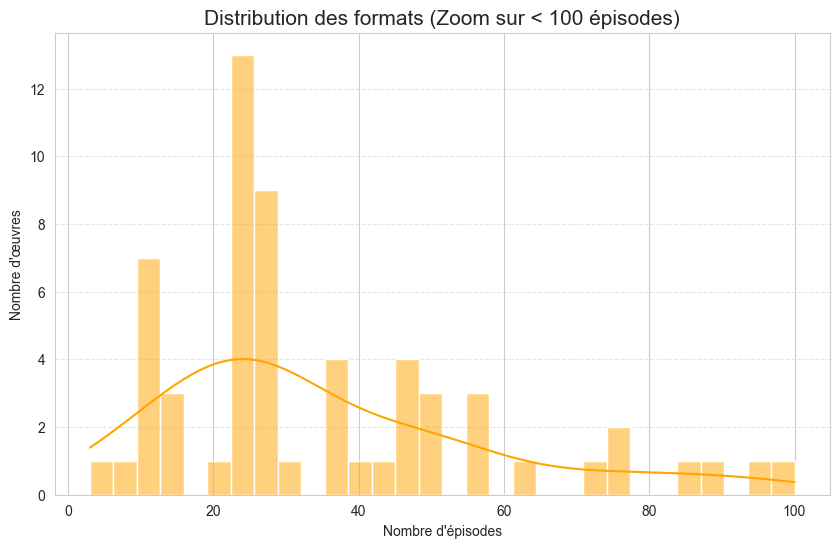

Format le plus fréquent (Mode) : 24 épisodes
Format central (Médiane) : 32.0 épisodes
L'œuvre la plus longue : 1090 épisodes
L'œuvre la plus courte : 3 épisode(s)


In [387]:
# --- 3.1.2 ANALYSE DE LA DURÉE ---

plt.figure(figsize=(10, 6))

# 1. Le Zoom 0 - 100 épisodes
data_zoom = df[df['Nb_Episodes'] <= 100]

# 2. L'Histogramme
sns.histplot(data=data_zoom, x='Nb_Episodes', kde=True, color='orange', bins=30)

plt.title('Distribution des formats (Zoom sur < 100 épisodes)', fontsize=15)
plt.xlabel("Nombre d'épisodes")
plt.ylabel("Nombre d'œuvres")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# 3. Les Statistiques
mode_val = df['Nb_Episodes'].mode()[0] 
mediane_val = df['Nb_Episodes'].median()

print(f"Format le plus fréquent (Mode) : {mode_val} épisodes")
print(f"Format central (Médiane) : {mediane_val} épisodes")
print(f"L'œuvre la plus longue : {df['Nb_Episodes'].max()} épisodes")
print(f"L'œuvre la plus courte : {df['Nb_Episodes'].min()} épisode(s)")

##### Constat sur les formats

L'analyse de la distribution des épisodes montre une structure très spécifique au dataset :

1.  **Un Standard "Long" (24-32 épisodes)** :
    Contrairement au standard moderne (12 épisodes), ce fichier privilégie des formats plus denses. Le format le plus fréquent est **24 épisodes**, et la médiane est à **32**.
    * *Conséquence :* L'algorithme traitera majoritairement des œuvres qui ont eu le temps de développer une histoire complexe.

2.  **Présence de mini série ?** :
    Avec un minimum à **3 épisodes**, le dataset inclut également les mini séries plus proches d'un format film que d'un format standard. **=>⚠️ A vérifier de suite s'il y a des notations sur des séries avec un faible nombre d'épisode au statut en cours ⚠️**

3.  **Présence d'Outliers** :
    Le maximum à **1090 épisodes** (probablement *One Piece* 👀) indique que le dataset mélange des séries courtes et des œuvres fleuves, ce qui posera un **défi de comparaison**.

##### ⚠️ Point d'étape : Exclusion des séries très courtes non finies

L'analyse de la distribution des formats (3.1.2) a révélé une anomalie : la présence d'œuvres très courtes (3-4 épisodes) potentiellement identifiées comme **"En cours"**.

**Décision méthodologique :**
Pour garantir la robustesse de la notation, il faut exclure les œuvres très courtes non terminées.



**Justification :**
* Une note basée sur le tout début d'une diffusion est provisoire et instable. L'algorithme ne doit juger que des séries ayant eu assez de temps pour développer la trame narrative. 

* Le format standard d'une saison d'animé est de 12 épisodes. 
Nous considérons qu'en dessous d'une **demi-saison (6 épisodes)**, la trame narrative n'a pas l'espace suffisant pour développer la complexité que notre algorithme cherche à évaluer.

* De plus, sur moins de 6 épisodes, l'écart-type entre le "Meilleur" et le "Pire" épisode devient statistiquement instable (un seul épisode pèse trop lourd dans la balance).

**Action :** Filtrage du dataset pour exclure les animés avec le critère de statut **"En cours"** ET **"< 6 épisodes"**.

In [388]:
# --- APPLICATION DU NETTOYAGE ---
print(f"Population avant nettoyage : {len(df)}")

# 1. Cible
# Aanimé En cours ET il a 6 épisodes ou moins
cible_a_supprimer = (df['Status'] == 'En cours') & (df['Nb_Episodes'] <= 6)

# 2. Filtre inversé
df = df[~cible_a_supprimer].copy()

# 3. Résultats
print(f"Population après nettoyage : {len(df)}")
print(f"Nombre d'animés supprimés : {cible_a_supprimer.sum()}")

# Vérification
restant = df[(df['Status'] == 'En cours') & (df['Nb_Episodes'] <= 6)]
if len(restant) == 0:
    print("Il n'y a plus aucune mini-série en cours dans le dataset.")

Population avant nettoyage : 71
Population après nettoyage : 70
Nombre d'animés supprimés : 1
Il n'y a plus aucune mini-série en cours dans le dataset.



<hr style="width:15%; margin-left: 0;">

### 3.1.3 Typologies des sources (Origine du Scénario)

Nous observons la répartition des sources d'origine (`Source`) pour comprendre la typologies des sources du dataset.

L'origine d'un animé influence souvent sa structure :
* **Manga / Light Novel :** Il s'agit d'adaptations. Le rythme peut être dicté par la publication papier, et peut ne pas être fidèle à l'original.

* **Original :** Le scénario est conçu spécifiquement pour l'écran, souvent avec un rythme plus maîtrisé et une fin définitive.

**Objectif :** Cette visualisation sert simplement à **caractériser le profil du dataset** (ex: est-ce une liste dominée par les adaptations de mangas ou une liste éclectique ?) pour mieux interpréter les résultats futurs.

Nombre de types de sources différents : 7
------------------------------
Source
Manga           53
Original         7
Light Novel      6
Web Manga        1
Manhwa           1
Visual Novel     1
Game             1
Name: count, dtype: int64


/var/folders/hn/7wbdlnhx2wx7rjz7lm3fl0zr0000gn/T/ipykernel_12565/1777978399.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


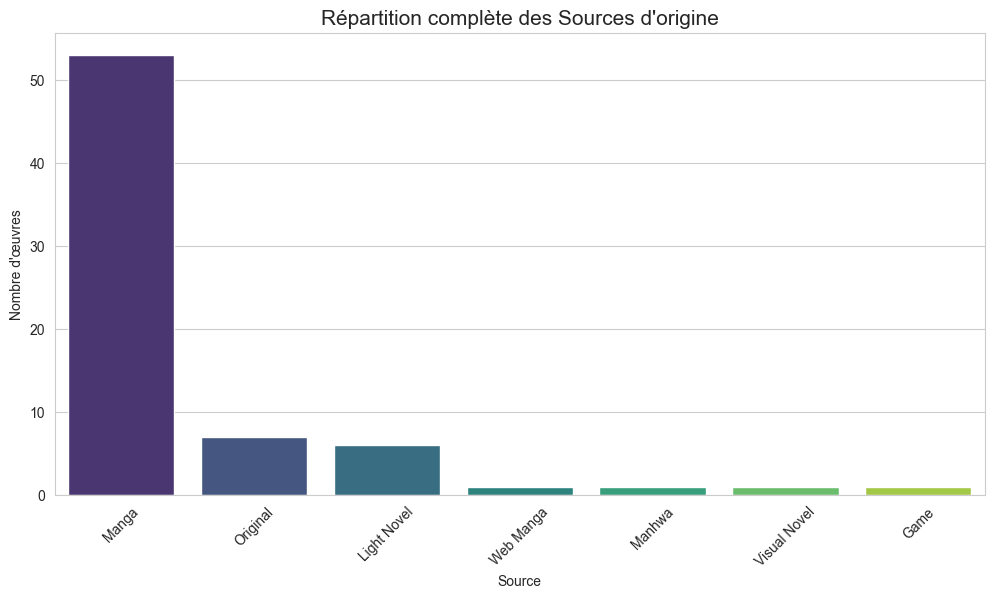

In [389]:
# --- 3.1.3 TYPOLOGIE DES SOURCES (VUE COMPLÈTE) ---
plt.figure(figsize=(12, 6))

# 1. Récupérer les sources
ordre_sources = df['Source'].value_counts().index

# 2. Graphique
sns.countplot(
    data=df,
    x='Source',
    order=ordre_sources, 
    palette='viridis'
)

plt.title('Répartition complète des Sources d\'origine', fontsize=15)
plt.xticks(rotation=45) # Indispensable pour lire les noms si y'en a beaucoup
plt.ylabel("Nombre d'œuvres")
plt.xlabel("Source")

# . Affichage des stats pour le constat
print(f"Nombre de types de sources différents : {df['Source'].nunique()}")
print("-" * 30)
print(df['Source'].value_counts()) # Affiche la liste textuelle complète

plt.show()

##### ---> Constat sur les Sources

Le graphique met en évidence la composition de la liste :
* **Dominance :** Les adaptations de **Mangas** représentent la grande majorité du fichier (53 sur 70).

* **Diversité :** Les autres formats (Original, Light Novel, Jeu...) sont très minoritaires.

**Conclusion :**
Cette distribution n'affecte pas le calcul du score, mais elle informe que le classement final sera majoritairement composé d'adaptations de mangas.

<hr style="width:15%; margin-left: 0;">

#### 3.1.4 Distribution Temporelle (Chronologie et contexte)

Nous analysons la répartition des années de sortie.

**Objectif :**
Identifier le profil temporel de l'échantillon :
* Est-ce une liste "Historique" couvrant plusieurs décennies ?

* Ou une liste "Moderne" concentrée sur les dernières années ?
Cette information est nécessaire pour contextualiser le futur classement.

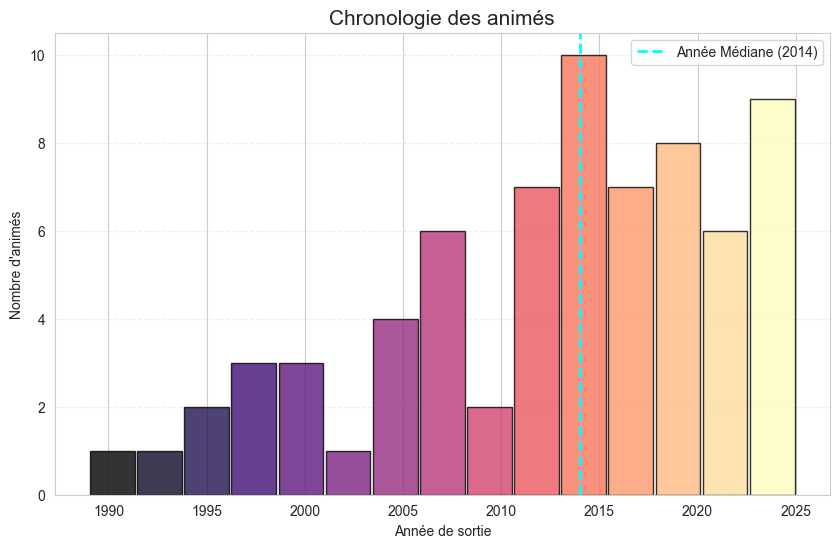

In [390]:

# --- 3.1.4 ANALYSE CHRONOLOGIQUE ---
plt.figure(figsize=(10, 6))


if 'Date_Pub' in df.columns:
    df['Annee'] = df['Date_Pub'].dt.year
else:
    print("Erreur : La colonne 'Date_Pub' est introuvable.")


# 1. Préparation des données
years = df['Annee'].dropna() 
n_bins = 15 


#numpy pour calculer les barres
counts, bins = np.histogram(years, bins=n_bins)
# centre de chaque barre
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# 2. Couleurs
cmap = plt.colormaps['magma']

# Échelle de couleur
norm = mcolors.Normalize(vmin=bin_centers.min(), vmax=bin_centers.max())
# Pour chaque barre, on calcule sa couleur basée sur son année centrale
bar_colors = cmap(norm(bin_centers))

# 3. Graphique + listing de couleurs différentes
plt.bar(bin_centers, counts, width=(bins[1]-bins[0])*0.95, color=bar_colors, edgecolor='black', alpha=0.8)


# 4. Médiane et esthétique
mediane = df['Annee'].median()
plt.axvline(mediane, color='cyan', linestyle='--', linewidth=2, label=f'Année Médiane ({int(mediane)})')

plt.title('Chronologie des animés', fontsize=15)
plt.xlabel('Année de sortie')
plt.ylabel("Nombre d'animés")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()



##### ---> Constat sur la Chronologie

L'analyse de la distribution temporelle révèle le profil suivant :

* **Concentration Moderne :** On observe une densité très forte d'animés sur les années récentes.

* **Présence Historique :** Le catalogue contient quelques œuvres plus anciennes, mais elles sont minoritaires.

* **Année Médiane :** L'année médiane se situe autour de **2014**, ce qui confirme que la majorité du dataset est constituée d'œuvres récentes.

<br>

**📌 Conclusion contextuelle pour le score final:**

Le dataset reflète principalement les standards de l'animation moderne (post-2015).

Par conséquent, le score final sera davantage calibré sur les attentes actuelles (rythme, qualité visuelle HD) que sur des critères historiques.

 Les quelques œuvres "Vintage" seront jugées en comparaison directe avec ces productions modernes.

1.  **Évolution des standards:**
    * Le score sera calibré sur les standards de l'animation moderne (HD, effets numériques, fluidité). 
    
    * Les œuvres "Vintage" risquent d'être techniquement désavantagées dans une comparaison directe, leur note pouvant souffrir de l'absence de ces standards visuels actuels même si le facteur nostalgie peut balancer cette standardisation vers la modernité.



2.  **Le Facteur "Hype" vs Stabilité :**
    * **Œuvres récentes :** Les notes peuvent être artificiellement gonflées par l'enthousiasme du moment ("Hype" de la sortie) et sont susceptibles de redescendre avec le temps.
    
    * **Œuvres anciennes :** Leurs notes sont généralement plus stables et "historiques", reflétant une qualité qui a résisté à l'épreuve du temps.

<br>

    ===>**⚠️ Ajout d'une nouvelle hypothèse H5+ (à vérifier) :**

Si l'analyse des corrélations (étape suivante) montre que l'ancienneté penalise la note, il serait pertinent d'intégrer un **"Facteur de Stabilité"** (bonus d'ancienneté) dans la finale.

**Objectif** : Contrebalancer l'effet de mode et valoriser les œuvres ayant passé l'épreuve du temps, pour garantir un classement équitable.

<hr style="width:15%; margin-left: 0;">

#### 3.1.5 Distribution du Statut (Fini vs En cours)

Nous regardons l'état de diffusion des œuvres (`Status`).

**Objectif :** Vérifier la stabilité des évaluations du classement.

**Justification :**

- Une oeuvre finie à une note plus **stable** qu'une oeuvre non finie car elle risque d'évoluer selon les futurs épisodes.

Savoir si le dataset contient beaucoup d'œuvres "En cours" permet de nuancer la validité des notes sur le long terme.

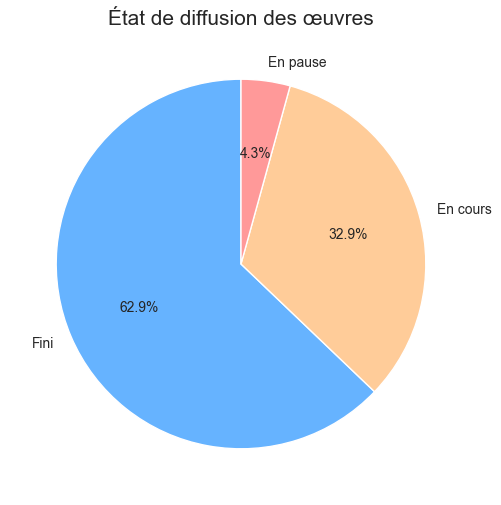

Terminées : 44 sur 70 (62.9%)
En cours  : 23 (32.9%)
En pause  : 3 (4.3%)


In [391]:
# --- 3.1.6 ANALYSE DU STATUT ---
plt.figure(figsize=(6, 6))

# 1. Compte des valeurs
status_counts = df['Status'].value_counts()

# 2. Graphique camembert
plt.pie(
    status_counts, 
    labels=status_counts.index, 
    autopct='%1.1f%%', 
    startangle=90,     
    colors=['#66b3ff','#ffcc99', '#ff9999'] 
)

plt.title('État de diffusion des œuvres', fontsize=15)
plt.show()

# 3. Chiffres clés
fini = status_counts.get('Fini', 0)
en_cours = status_counts.get('En cours', 0)
en_pause = status_counts.get('En pause', 0)
total = len(df)
print(f"Terminées : {fini} sur {total} ({round(fini/total*100, 1)}%)")
print(f"En cours  : {en_cours} ({round(en_cours/total*100, 1)}%)")
print(f"En pause  : {en_pause} ({round(en_pause/total*100, 1)}%)")

##### ---> Constat sur le Statut

La répartition met en évidence deux dynamiques :

* **Une base solide (63% terminés) :** La majorité des œuvres (44/70) sont terminées. Leurs notes sont donc stabilisées et jugent l'œuvre dans son intégralité (fin incluse).
* **Une forte instabilité (33% en cours) :** Un tiers du dataset (23/70) est composé d'œuvres en cours de diffusion.

**📌 Conclusion contextuelle pour le Score Final :**

Il faudra garder à l'esprit que pour 33% du catalogue, la note est **provisoire** pour les oeuvres en cours car elles risquent d'évoluer, contrairement aux œuvres terminées qui sont jugées avec plus de recul et entiereté.

<hr style="width:15%; margin-left: 0;">

#### 📝 Synthèse Globale de l'Analyse de distribution (Bilan 3.1)

L'analyse détaillée des distributions nous permet de dresser le portrait type de notre échantillon et de fixer les règles de notre futur algorithme.

**3.1.1 Distribution des Notes (Calibrage) :**
* **Constat :** Une moyenne très élevée à **8.30/10** et une zone vide entre 6 et 7.
* **Décision :** L'algorithme sera sévère car la notation est généreuse. La note "neutre" n'est pas 5 mais 8. Une note de 7/10 sera traitée comme une contre-performance.

**3.1.2 Distribution des Formats (Volume) :**
* **Constat :** Le dataset privilégie les formats denses (Médiane à 32 épisodes) mais contenait des anomalies (séries très courtes en cours).
* **Action Méthodologique :** Exclusion des œuvres **"En cours" de moins de 6 épisodes** pour garantir que la notation repose sur un développement narratif suffisant.

**3.1.3 Typologie des Sources :**
* **Constat :** Dominance massive des adaptations de **Mangas** (75%+).
* **Impact :** Information contextuelle. Le score reflétera principalement la capacité des studios à réaliser ces adapatations.

**3.1.4 Distribution Temporelle (Chronologie) :**
* **Constat :** Forte concentration sur les œuvres modernes (**Post-2015**) et standards visuels récents (HD).
* **Hypothesis H5+ :** Risque de Biais (Hype). Si les corrélations montrent que l'ancienneté pénalise la note, nous intégrerons un **"Bonus de Stabilité"** pour les œuvres classiques.

**3.1.5 Distribution du Statut (Stabilité) :**
* **Constat :** 33% du dataset est **"En cours de diffusion"**.
* **Impact :** Une partie du classement final reflètera une note "actuelle" et "récente" des animés. Les notes de ce tiers du catalogue sont **volatiles** et susceptibles d'évoluer, contrairement aux 63% d'œuvres terminées.


**Transition vers 3.2 :**
Maintenant que le profil du dataset est défini (Notation généreuse, Moderne, Volatile), nous allons croiser ces variables. L'analyse des corrélations nous dira si ces caractéristiques (ex: être un animé récent) influencent mathématiquement la note (H5+) en plus d'apporter d'autres critères nécessaires à la réalisation du score final.

<br>

---

### 3.2 Analyse des corrélations

Nous entrons maintenant dans la phase de croisement des données.
L'objectif est de vérifier mathématiquement si certaines caractéristiques (Âge, Longueur) influencent la `Note_Globale`.

Nous allons procéder du général au particulier pour valider nos hypothèses :

0.  **3.2.0 Vue d'ensemble (Matrice de Corrélation) :**
    Nous utiliserons une **Heatmap** pour scanner l'intégralité du dataset d'un coup d'œil. Afin de repérer les liens forts (positifs ou négatifs) entre les variables.
    
    <br>

1.  **3.2.1 Focus Chronologique (Validation H5+) :**
    Nous zoomerons sur le lien `Année vs Note` via un nuage de points pour confirmer ou infirmer l'hypothèse de la récence.
    
    <br>

2.  **3.2.2 Focus Format (Impact de la durée) :**
    Nous analyserons si la longueur de l'œuvre (`Nb_Episodes`) est corrélée à sa qualité perçue.
    
    <br>

3.  **3.2.3 Focus Régularité (Lissage de la note globale)**
    Nous analyserons si la note globale peut masquer la Régularité des épisodes ce qui permettra de valider ou d'invalider les hypothèses H1 et H2
    
    <br>

4.  **3.2.4 Focus Statut (Impact d'un animé récent en cours)**
    Nous analyserons si le statut de production d'un animé peut impacter les notation globales.
    
    <br>

5.  **3.2.5 Focus Studio (Qualité du studio)**
    Nous vérifierons s'il existe une corrélation entre le studio et la qualité finale.

    
 <br>

<hr style="width:15%; margin-left: 0;">

#### 3.2.0 Vue d'ensemble (Matrice de Corrélation)

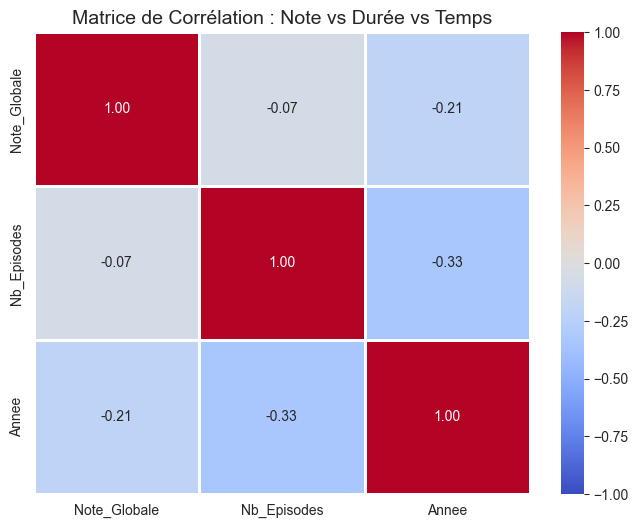

In [392]:
# --- 3.2.1 MATRICE DE CORRÉLATION ---
plt.figure(figsize=(8, 6))

# 1. Création de la colonne 'Annee' si elle n'existe pas encore
if 'Date_Pub' in df.columns and 'Annee' not in df.columns:
    df['Annee'] = df['Date_Pub'].dt.year

# 2. Sélection des colonnes pour la corrélation
cols_corr = ['Note_Globale', 'Nb_Episodes', 'Annee']

# 3. Calcul de la matrice
corr_matrix = df[cols_corr].corr()

# 4. Affichage graphique (Heatmap)
sns.heatmap(
    corr_matrix, 
    annot=True,        
    cmap='coolwarm',    
    fmt=".2f",          
    vmin=-1, vmax=1,    
    linewidths=1,
    linecolor='white'
)

plt.title('Matrice de Corrélation : Note vs Durée vs Temps', fontsize=14)
plt.show()

##### ---> Analyse des Coefficients

La matrice nous livre deux verdicts :

1.  **L'indépendance du Format (-0.07) :**
    Il n'y a **aucune corrélation** entre la durée et la note. La qualité d'une œuvre ne dépend pas de son temps de développement narratif.
    * *Décision :* Le nombre d'épisodes ne sera pas un facteur discriminant dans l'algorithme.
    
    <br>

2.  **Positvité à l'ancienneté innatendue (-0.21) :**
    Nous observons une légère corrélation **négative**.
    * *Sens :* Plus l'œuvre est récente, plus sa note tend à être (légèrement) plus basse.
    
    * *Interprétation :* Cela contredit l'hypothèse d'une **Surnotation par Hype** des œuvres récentes. Au contraire, cela suggère que : les seules œuvres anciennes présentes dans ce top sont des classiques intemporels, ce qui tire leur moyenne vers le haut face au flux massif des nouveautés.
       
 <br>

<hr style="width:15%; margin-left: 0;">

#### 3.2.1 Focus Chronologique : L'épreuve du temps (Validation H5+)

Nous approfondissons le lien entre l'ancienneté et la note (`Annee` vs `Note_Globale`).
La Heatmap a révélé une corrélation négative (-0.21), suggérant que les œuvres anciennes sont mieux notées.

**Objectif du graphique :**
Nous voulons vérifier si cette tendance est réelle sur l'ensemble du dataset ou si elle est causée par quelques chefs-d'œuvre isolés.


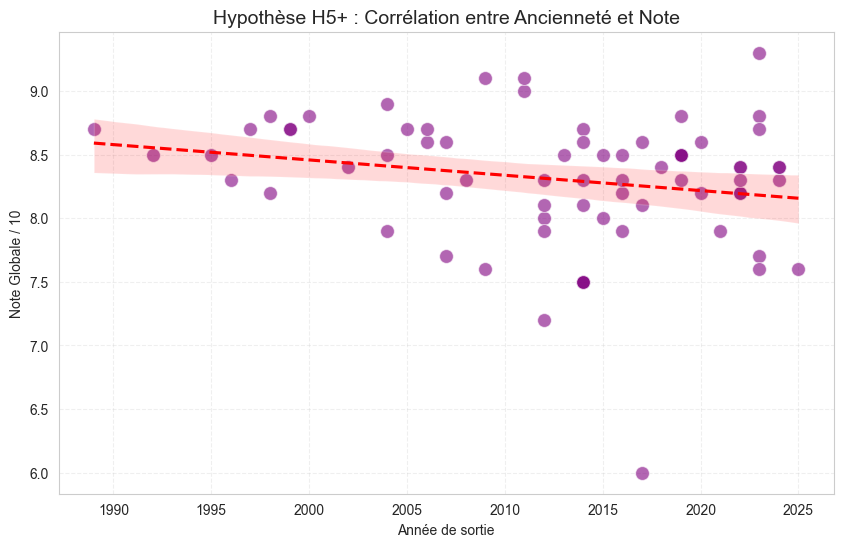

Coefficient de corrélation exact : -0.210


In [393]:
# --- 3.2.2 FOCUS CHRONOLOGIQUE (H5+) ---
plt.figure(figsize=(10, 6))

# 1. Nuage de points
sns.scatterplot(
    data=df, 
    x='Annee', 
    y='Note_Globale', 
    color='purple', 
    alpha=0.6, 
    s=100)

# 2. Droite de tendance
sns.regplot(
    data=df, 
    x='Annee', 
    y='Note_Globale', 
    scatter=False,
    color='red', 
    line_kws={"linestyle": "--"} 
)

plt.title('Hypothèse H5+ : Corrélation entre Ancienneté et Note', fontsize=14)
plt.xlabel('Année de sortie')
plt.ylabel('Note Globale / 10')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

# 3. Affichage du coefficient précis
coef = df['Annee'].corr(df['Note_Globale'])
print(f"Coefficient de corrélation exact : {coef:.3f}")

##### ---> Constat de l'ancienneté et la récence

Le graphique montre une pente descendante (corrélation négative) : les œuvres anciennes ont en moyenne, une note plus élevée que les œuvres récentes.

**1. Invalidation de l'hypothèse H5+ (Hype) :**
Les données contredisent l'idée que les animés récents seraient artificiellement surnotés par la "Hype". Au contraire, ils atteingnent difficilement les moyennes des classiques.

**2. Explication par le Volume :**
Ce phénomène s'explique par la différence de densité :
* **Zone "Ancienne" (Gauche) :** Faible volume. Seules les œuvres cultes ont survécu à l'épreuve du temps et figurent dans cette liste. La sélection est élitiste -> Note moyenne très haute.

* **Zone "Moderne" (Droite) :** Fort volume. Le dataset intègre les chefs-d'œuvre actuels mais aussi de très nombreuses "bonnes séries". Cette abondance **normalise la moyenne** vers le bas par un effet de dilution.

**Conclusion Décisionnelle :**
Nous n'appliquerons **PAS** de "Bonus de Stabilité" aux œuvres anciennes (elles n'en ont pas besoin, elles dominent déjà).
Nous n'appliquerons pas non plus de malus aux œuvres récentes. Le score restera **neutre temporellement**.

    
 <br>

<hr style="width:15%; margin-left: 0;">

#### 3.2.2 Focus Format : L'Impact de la Durée

Nous analysons la relation entre le nombre d'épisodes (`Nb_Episodes`) et la `Note_Globale`.

**Problématique technique :**
La présence de longues séries (> 500 épisodes comme *One Piece*) écrase l'échelle du graphique. Pour y voir clair, nous allons effectuer un **Zoom** sur les formats standards (moins de 200 épisodes).

**Objectif :**
Confirmer l'absence de corrélation vue dans la Heatmap (-0.07). Si la courbe est plate, cela validera que le format (court ou long) n'est pas un critère de qualité en soi.

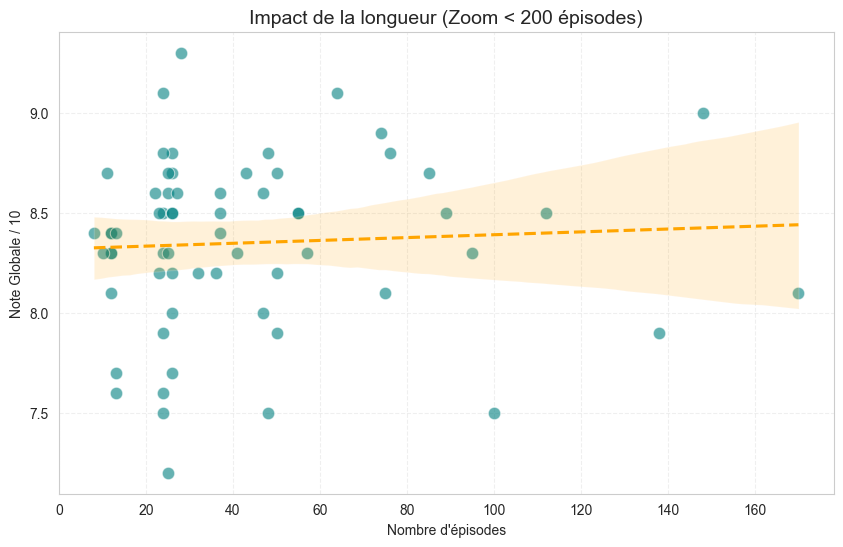

Coefficient de corrélation global (Durée vs Note) : -0.071


In [394]:
# --- 3.2.3 FOCUS : IMPACT DU FORMAT (ZOOM) ---
plt.figure(figsize=(10, 6))

# 1. Filtrage pour le zoom 
df_zoom = df[df['Nb_Episodes'] < 200]

# 2. Nuage de points
sns.scatterplot(
    data=df_zoom, 
    x='Nb_Episodes', 
    y='Note_Globale', 
    color='teal', 
    alpha=0.6, 
    s=80
)

# 3. Droite de tendance
sns.regplot(
    data=df_zoom, 
    x='Nb_Episodes', 
    y='Note_Globale', 
    scatter=False, 
    color='orange',
    line_kws={"linestyle": "--"}
)

plt.title('Impact de la longueur (Zoom < 200 épisodes)', fontsize=14)
plt.xlabel("Nombre d'épisodes")
plt.ylabel('Note Globale / 10')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

# Rappel du coefficient
coef_ep = df['Nb_Episodes'].corr(df['Note_Globale'])
print(f"Coefficient de corrélation global (Durée vs Note) : {coef_ep:.3f}")

##### ---> Constat : La "Zone de Densité" et l'indépendance du format

Le graphique confirme deux réalités structurelles :

1.  **L'indépendance de la qualité :**
    La droite de régression est quasi-horizontale **(confirmée par le coefficient négligeable de -0.07)**.
    * *Verdict :* La durée d'une œuvre ne préjuge pas de sa qualité. Une série de 100 épisodes n'a pas plus de chance d'avoir une bonne note qu'une minisérie.

2.  **La "Zone de Densité" (Cluster en haut à gauche) :**
    On observe une forte concentration d'œuvres très bien notées (> 8/10) dans la fourchette **12-26 épisodes**.
    * *Interprétation :* Le format standard moderne (12 ou 24 épisodes) domine le classement. Les séries longues sont des exceptions ("Outliers") plutôt que la norme.

**Conclusion Décisionnelle :**
Le critère de durée sera **neutre** dans l'algorithme.
Nous n'accorderons ni bonus pour la complexité d'une série longue, ni malus pour la brièveté d'une saison courte. Le score se concentrera uniquement sur le contenu, pas le contenant.
    
 <br>

<hr style="width:15%; margin-left: 0;">

#### 3.2.3 Focus Régularité : La Note Globale est-elle un masque ?

Nous abordons ici un point critique de notre analyse éditoriale : la **fiabilité** de la note globale.

**Le Problème du "Lissage" :**
La `Note_Globale` est une moyenne. Or, mathématiquement, deux animés peuvent avoir la même moyenne de **8/10** avec des profils très différents :
1.  **Le profil "Valeur Sûre" :** Tous les épisodes valent 8/10. (Stable).
2.  **Le profil "Montagnes Russes" :** Des épisodes à 10/10 et des "crashs" à 6/10. (Instable).

**Validation des Hypothèses (H1 & H2) :**
Nous suspectons que la note globale cache souvent ces "trous". Pour le vérifier, nous allons visualiser l'écart entre la note globale et la note du **pire épisode**.

* **Hypothèse H1 :** La note globale seule est insuffisante.
* **Hypothèse H2 :** La régularité est un facteur clé.

**L'Objectif :**
Visualiser cet écart pour déterminer si nous avons besoin de créer une **"Pénalité de Régularité"** dans notre score final.

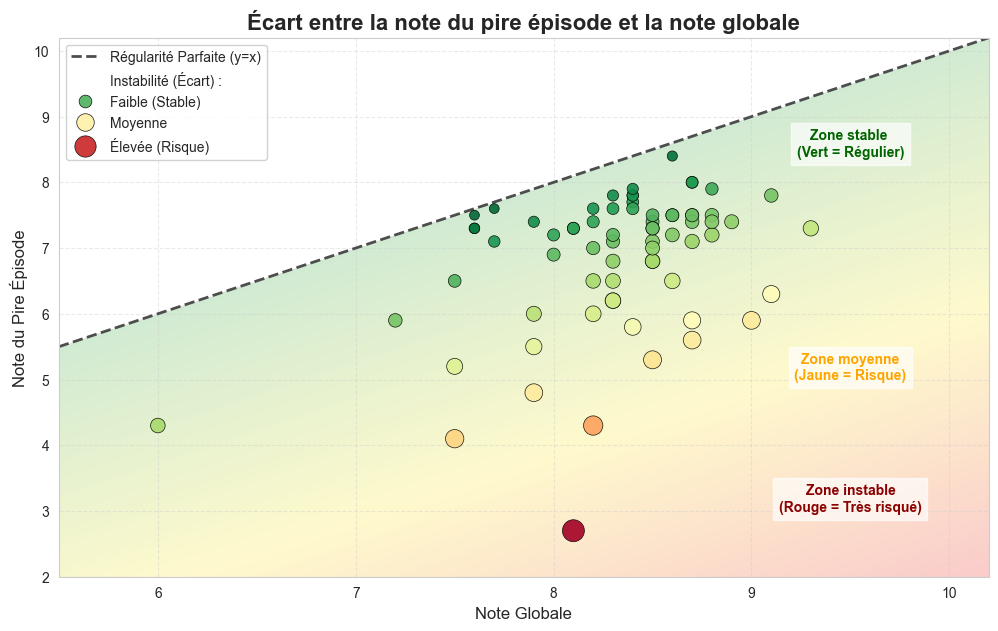

In [395]:


plt.figure(figsize=(12, 7))

# Définition des limites des axes
x_min, x_max = 5.5, 10.2
y_min, y_max = 2.0, 10.2

# --- 1. Dégradé de fond ---
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
Z = xx - yy
Z_masked = np.ma.masked_where(Z < 0, Z)
cmap_risk = mcolors.LinearSegmentedColormap.from_list("", ["#66bb6a", "#ffee58", "#ef5350"])

plt.imshow(Z_masked, extent=(x_min, x_max, y_min, y_max), origin='lower',
           cmap=cmap_risk, alpha=0.3, aspect='auto', zorder=0)

# --- 2. Ligne de régularité parfaite ---
line_reg, = plt.plot([x_min, x_max], [x_min, x_max], ls="--", c=".3", linewidth=2, label="Régularité Parfaite (y=x)", zorder=1)

# --- 3. Nuage de points (Calcul TEMPORAIRE) ---
# Calcul de l'écart pour le graphique
ecart_temporaire = df['Note_Globale'] - df['Note_Pire_Ep']

scatter = sns.scatterplot(
    data=df,
    x='Note_Globale',
    y='Note_Pire_Ep',
    hue=ecart_temporaire,  
    palette='RdYlGn_r',
    size=ecart_temporaire, 
    sizes=(50, 250),
    alpha=0.9,
    edgecolor='black', linewidth=0.5,
    zorder=2
)

# --- 4. Légende  ---
handles, labels = plt.gca().get_legend_handles_labels()
invisible_handle = mpatches.Patch(color='none', label='Instabilité (Écart)')

final_handles = []
final_labels = []

# A. Ligne
final_handles.append(line_reg)
final_labels.append("Régularité Parfaite (y=x)")

# B. Sous-titre
final_handles.append(invisible_handle)
final_labels.append("Instabilité (Écart) :")

# C. Point
scatter_handles = [h for h, l in zip(handles, labels) if l != "Régularité Parfaite (y=x)"]

if len(scatter_handles) > 2:
    indices_scatter = [0, len(scatter_handles)//2, -1]
    points_labels = ["Faible (Stable)", "Moyenne", "Élevée (Risque)"]
    
    for i, label_text in zip(indices_scatter, points_labels):
        final_handles.append(scatter_handles[i])
        final_labels.append(label_text)

plt.legend(final_handles, final_labels, loc='upper left', frameon=True, framealpha=0.9)

# --- 5. Esthétique ---
plt.title('Écart entre la note du pire épisode et la note globale', fontsize=16, fontweight='bold')
plt.xlabel('Note Globale', fontsize=12)
plt.ylabel('Note du Pire Épisode', fontsize=12)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.grid(True, linestyle='--', alpha=0.4, zorder=0)

# --- 6. Annotations ---
plt.text(9.5, 8.4, 'Zone stable \n(Vert = Régulier)', color='darkgreen', fontweight='bold', fontsize=10, ha='center', backgroundcolor='#ffffffaa')
plt.text(9.5, 5.0, 'Zone moyenne\n(Jaune = Risque)', color='orange', fontweight='bold', fontsize=10, ha='center', backgroundcolor='#ffffffaa')
plt.text(9.5, 3.0, 'Zone instable\n(Rouge = Très risqué)', color='darkred', fontweight='bold', fontsize=10, ha='center', backgroundcolor='#ffffffaa')

plt.show()

##### ---> Constat Critique : La Note Globale est un "Masque"

Ce graphique valide les hypothèses fondatrices :

1.  **Validation H1 (La note globale est insuffisante) :**
<br>

    En regardant les points situés dans la **zone à risque** (en bas à droite).
    
      Nous avons des œuvres avec une moyenne excellente de **8.0+** (ce qui suggère un "Très bon") mais qui cachent des épisodes catastrophiques descendant sous la barre des **3/10**.
    * *Verdict :* Se fier uniquement à la Note Globale expose le spectateur à des deceptions narratives majeures.
    
<br>

2.  **Validation H2 (La régularité est un facteur clé) :**
    L'écart entre la ligne pointillée (Note_Glabale = Note_Pire_Ep) et les points colorés montre l'instabilité.
    * Les points **Verts** sont des valeurs sûres (Note stable).
    
    * Les points **Rouges** sont instables (Risqués).

    <br>
    
`🔴 Décision Stratégique :
Il est impératif de construire un **Indicateur d'Écart** et un **Indicateur de Régularité** et de l'intégrer dans le Score Final.
L'objectif est de pénaliser les animés "Instables" pour privilégier les expériences fluides sans mauvaises surprises.`


<hr style="width:15%; margin-left: 0;">


#### 3.2.4 Focus Statut : Le statut a-t-il un lien avec les notes globales ?

Les animés récents ou en cours de diffusion sont-ils artificiellement surnotés à cause de l'excitation de la sortie ?

À l'inverse, les séries terminées depuis longtemps sont-elles jugées plus sévèrement ?

**L'objectif :**
Nous allons comparer les notes des animés selon leur statut (**Fini**, **En cours** ou **En pause**).
* Si les notes sont très différentes, nous devrons créer un "malus" pour corriger l'effet de mode.

* Si les notes sont équivalentes, alors le statut n'a pas d'importance et nous pourrons les traiter à égalité.

/var/folders/hn/7wbdlnhx2wx7rjz7lm3fl0zr0000gn/T/ipykernel_12565/2265904501.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


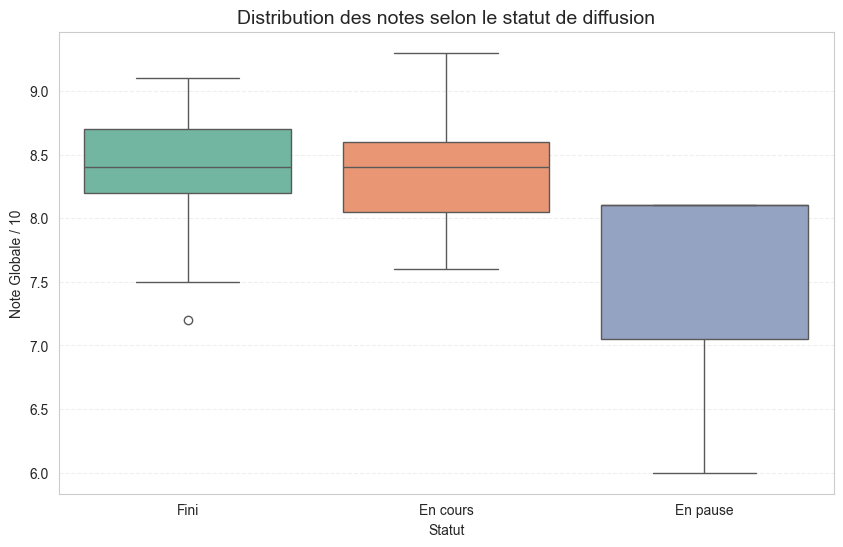

Moyennes par statut :
Status
En cours    8.326087
En pause    7.400000
Fini        8.359091
Name: Note_Globale, dtype: float64


In [396]:
# --- 3.2.5 FOCUS : IMPACT DU STATUT ---
plt.figure(figsize=(10, 6))

order_status = df['Status'].value_counts().index

# Boxplot 
sns.boxplot(
    data=df, 
    x='Status', 
    y='Note_Globale', 
    order=order_status,
    palette='Set2'
)

plt.title('Distribution des notes selon le statut de diffusion', fontsize=14)
plt.xlabel('Statut')
plt.ylabel('Note Globale / 10')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

# Calcul des moyennes exactes 
mean_stats = df.groupby('Status')['Note_Globale'].mean()
print("Moyennes par statut :")
print(mean_stats)

##### ---> Constat : Stabilité inattendue et Absence de Biais

L'analyse des boîtes à moustaches nous livre un enseignement contre-intuitif mais crucial :

1.  **Invalidation de l'"Euphorie de l'instant" :**
    Les médianes des catégories `Fini` et `En cours` sont quasi-identiques (~8.4).
    * *Interprétation :* Le statut de diffusion n'influe pas sur la note globale. Les œuvres en cours ne bénéficient pas d'une surnotation artificielle due à l'excitation du moment.

    * *Décision :* Nous n'appliquerons **aucun correctif temporel** (pas de malus pour les séries en cours).

     <br>


2.  **La volatilité du statut "En pause" :**
    La catégorie `En pause` montre une dispersion bien plus forte vers le bas (médiane à ~8.1, moustaches descendant à 6.0).
    
    * *Décision :* Ce statut est un indicateur de risque (production chaotique). Cela est déjà refleté par les notations globales, ce n'est donc pas un élément à prendre en compte pour la notation finale.

<hr style="width:15%; margin-left: 0;">

#### 3.2.5 Focus Studio : La "Marque" est-elle un gage de qualité ?

Après avoir analysé la durée et le statut, nous nous penchons sur le producteur.
L'industrie de l'animation fonctionne souvent à la réputation : un animé produit par *Madhouse* ou *MAPPA* attire immédiatement l'attention.

**L'objectif :**
Nous voulons vérifier s'il existe une corrélation entre le studio et la qualité finale.
Pour cela, nous devons surmonter deux défis techniques :
1.  **Le volume :** Comment comparer un studio qui a produit 50 animés avec un autre qui n'en a fait que 3 ?

2.  **Les collaborations :** Beaucoup d'animés sont co-produits (ex: *Wit Studio / MAPPA*). Nous devons attribuer le mérite aux deux.

Nous allons utiliser un **Graphique à Bulles** pour visualiser le rapport **Quantité vs Qualité** en selectionnant les studios ayant réalisé 3 oeuvres minimum pour avoir un minimum de régularité.
* **Axe X :** Volume de production.

* **Axe Y :** Note moyenne.

* **Taille de la bulle :** Importance du studio.

In [397]:
# --- CORRECTION PRÉALABLE DES DONNÉES ---
# Correction d'une erreur de saisie identifiée : "Wit" -> "Wit Studio"
# Cela permet d'éviter que ce studio soit compté séparémment.
df.loc[df['Studio'] == 'Wit', 'Studio'] = 'Wit Studio'

print("Correction effectuée. Nombre de 'Wit' incorrects restants :", df[df['Studio'] == 'Wit'].shape[0])

Correction effectuée. Nombre de 'Wit' incorrects restants : 0


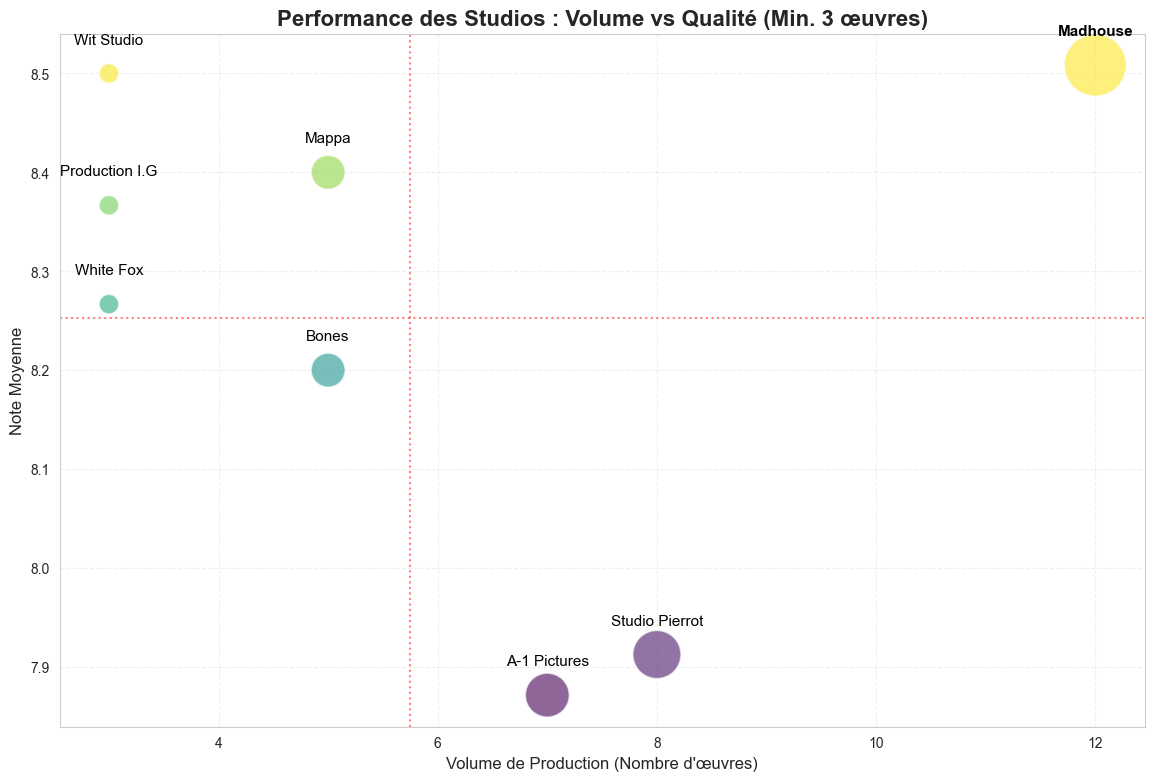

In [398]:
# --- 1. PRÉPARATION ET NETTOYAGE DES DONNÉES ---
# Travaille sur copie pour ne pas abimer l'original
df_studios = df.copy()

# Fonction pour séparer les collaborations (ex: "Wit Studio / MAPPA")
def clean_and_split_studios(text):
    if not isinstance(text, str): return []
    text = text.lower()

    # Remplacer les séparateurs possibles par un slash
    for sep in [',', ' & ', ' and ', ' + ', ';']:
        text = text.replace(sep, '/')

    # Split
    parts = text.split('/')
    return [p.strip().title() for p in parts if p.strip() != '']

# Application du nettoyage et explosion (une ligne par studio)
df_studios['Studio'] = df_studios['Studio'].apply(clean_and_split_studios)
df_studios = df_studios.explode('Studio')

# --- 2. CALCUL DES STATISTIQUES ---
studio_stats = df_studios.groupby('Studio').agg(
    Nombre_Animes=('Note_Globale', 'count'),
    Note_Moyenne=('Note_Globale', 'mean')
).reset_index()

# FILTRE : studios avec au moins 3 œuvres (seuil de régularité)
df_bubble = studio_stats[studio_stats['Nombre_Animes'] >= 3]

# --- 3. CRÉATION DU BUBBLE CHART ---
plt.figure(figsize=(14, 9))

sns.scatterplot(
    data=df_bubble,
    x='Nombre_Animes',
    y='Note_Moyenne',
    size='Nombre_Animes',
    sizes=(200, 2000), 
    hue='Note_Moyenne',
    palette='viridis',
    alpha=0.6,
    legend=False
)

# --- 4. ANNOTATION INTELLIGENTE ---

top_volume = df_bubble.nlargest(8, 'Nombre_Animes')['Studio'].tolist()
top_quality = df_bubble.nlargest(5, 'Note_Moyenne')['Studio'].tolist()
labels_to_show = set(top_volume + top_quality + ['Wit Studio', 'Mappa']) 

for i in range(df_bubble.shape[0]):
    row = df_bubble.iloc[i]
    if row['Studio'] in labels_to_show:
        
        weight = 'bold' if row['Studio'] == 'Madhouse' else 'normal'
        plt.text(
            x=row['Nombre_Animes'], 
            y=row['Note_Moyenne'] + 0.03, 
            s=row['Studio'], 
            fontdict={'weight': weight, 'size': 11, 'color': 'black'},
            ha='center'
        )

# Esthétique
plt.title('Performance des Studios : Volume vs Qualité (Min. 3 œuvres)', fontsize=16, fontweight='bold')
plt.xlabel('Volume de Production (Nombre d\'œuvres)', fontsize=12)
plt.ylabel('Note Moyenne', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)

# Lignes médianes pour repère
plt.axvline(x=df_bubble['Nombre_Animes'].mean(), color='red', linestyle=':', alpha=0.5)
plt.axhline(y=df_bubble['Note_Moyenne'].mean(), color='red', linestyle=':', alpha=0.5)

plt.show()

##### ---> Constat : Le défi technique de volume brisé par Madhouse

L'analyse graphique nous permet de trancher immédiatement un débat technique complexe.

<br>

**1. Le Défi (Quantité vs Qualité) :**

Statistiquement, nous craignions un biais de volume : plus un studio produit d'œuvres, plus il est difficile de maintenir une moyenne d'excellence (risque de dilution de la qualité ou de retour à la moyenne). Comparer un studio à 12 œuvres contre un studio à 3 œuvres semblait risqué.

<br>

**2. La Réalité des Données (L'outlier positif Madhouse) :**

Le graphique *Volume vs Qualité* prouve qu'il n'est pas nécessaire de contourner ce problème mathématiquement, car la réalité l'a déjà résolu :
* **L'Exception Madhouse :** Le studio possède à la fois le **plus gros volume** (extrême droite du graphe) ET la **meilleure note moyenne** (haut du graphe).
* **Conclusion :** Madhouse ne subit pas la production de masse. Au contraire, leur nom est une garantie de qualité *malgré* le volume.

<br>

`🔴 Décision Stratégique:
Le lien entre le studio et la performance est évident et robuste. Nous n'avons pas besoin de normaliser artificiellement les moyennes. Nous intégrerons directement un Bonus Studio pour valoriser cette "marque de fabrique" (Tier S pour Madhouse, Tier A pour les suiveurs comme MAPPA/Wit/IG/White Fox) car ils sont placés au dessus de la médiane de notation.`

<hr style="width:15%; margin-left: 0;">

#### 3.3 Bilan de l'Analyse Exploratoire : La Recette du Score

Après avoir testé nos 5 grandes hypothèses, nous avons enfin séparé les intuitions des vrais indicateurs de qualité.

Voici le verdict final qui servira pour la construction pour la construction du **Score Éditorial**:

| Variable Analysée | Tendance Observée | Décision pour le Score |
| :--- | :--- | :--- |
| **1. Chronologie** (Année) | **Filtre temporel :** Les vieux animés semblent mieux notés car seuls les chefs-d'œuvre ont survécu. Pas d'effet de "Hype" récente détectée. | **NEUTRE** (Aucune correction temporelle). |
| **2. Format** (Épisodes) | **Indépendance :** La durée n'a aucun impact sur la qualité (corrélation nulle). | **NEUTRE** (Aucun traitement). |
| **3. Statut** (En cours/Fini) | **Pas d'effet de mode :** Les séries en cours ne sont pas surnotées par l'euphorie de l'attente. | **NEUTRE** (Aucun traitement). |
| **4. Régularité** (Min -> Global) | **Signal Fort :** La Note Globale masque les épisodes catastrophiques. L'écart type est un indicateur de risque majeur. | **🔴 MALUS DE RÉGULARITÉ** (Pénaliser l'instabilité). |
| **5. Studio** (Production) | **Signal Fort :** La "nom" compte. Madhouse brise les stats avec un volume énorme ET une qualité. | **❇️ BONUS STUDIO** (Valoriser les Tiers S et A). |

<br>

---


### 4. Construction du Score : Feature Engineering

Après avoir nettoyé et exploré et les données, nous passons à la phase de construction.
Notre objectif est de transformer la `Note_Globale` brute en un **Score Éditorial** plus robuste.

Pour cela, nous allons créer trois leviers d'ajustement basés sur nos conclusions précédentes :

1.  Un **Malus de Régularité** (pour sanctionner l'instabilité).

2.  Un **Bonus Studio** (pour valoriser le savoir-faire technique).

3.  Un **Ajustement de Sévérité** (pour corriger la générosité naturelle des notes).

 <br>

<hr style="width:15%; margin-left: 0;">

#### 4.1 La Stratégie de la Régularité

Nous avons établi qu'une moyenne peut être trompeuse. Un animé qui alterne entre le génie (10/10) et le médiocre (2/10) offre une expérience frustrante pour le spectateur.

Nous définissons donc la **Régularité** ainsi :
$$Ecart = Note_{Meilleur\_Ep} - Note_{Pire\_Ep}$$
$$Score\_Regularite = 10 - Ecart$$

##### Pourquoi un coefficient de pénalité de 10% ?
Nous appliquerons un malus égal à **10% de l'écart**. Ce choix de calibration (0.10) repose sur deux principes éthiques :

<br>

**1. Éviter la double peine :**

Lorsqu'un épisode est raté, il fait déjà baisser la moyenne globale mathématiquement. Notre malus ne doit pas punir l'œuvre une seconde fois pour la note basse, mais sanctionner uniquement **l'inconfort de l'irrégularité**.

<br>

**2. Le principe de sanction, pas destruction :**

Nous voulons pénaliser sans disqualifier injustement. Pour visualiser l'impact de notre coefficient (10%), appliquons-le sur un **écart standard de 3 points** (ce qui génère un malus de **-0.3 pts**) sur différents profils :

* **L'Excellent (9.0 $\rightarrow$ 8.7) :** Le chef-d'œuvre perd quelques décimales pour son manque de perfection, mais il reste dans l'élite. La sanction est juste.

* **Le Très Bon (8.0 $\rightarrow$ 7.7) :** La série reste b"onne", mais perd son statut de "référence".

* **Le Bon (7.0 $\rightarrow$ 6.7) :** C'est le point de bascule. Une série juste "bonne" mais instable est rétrogradée en "Moyenne".

* **Le Moyen (6.0 $\rightarrow$ 5.7) :** C'est la goutte de trop. L'instabilité fait basculer une œuvre fragile dans la zone "À éviter".

<br>

<hr style="width:15%; margin-left: 0;">

#### 4.2 La Stratégie du "Bonus Studio"

Notre analyse a montré une corrélation forte entre certains studios (Madhouse, MAPPA...) et la qualité finale.
Nous accordons un **Bonus Studio** (+0.30 pour le Tier S, +0.15 pour le Tier A).

<br>

**La Justification :**


Ce bonus ne signifie pas qu'un grand studio ne peut pas se planter. Il valorise les **moyens de production** (Budget, Talents, Gestion de projet, environnement établi).

À note équivalente, un animé produit par Madhouse bénéficiera souvent d'une meilleure finition technique (animation, son, doublage) qu'un studio inconnu disposant de moins de ressources.

* **Cas du Vautrage d'un grand studio:** Si un grand studio sort une série catastrophique (très instable), le Malus de Régularité (dynamique) deviendra rapidement supérieur au Bonus Studio (fixe). Le prestige ne suffira pas à sauver la note finale. Le système ne prend pas le dessus sur l'irégularité qui est un critère plus important.



In [399]:
# --- 4.1 + 4.2 CRÉATION DES INDICATEURS ---

# 1. SCORE DE RÉGULARITÉ
# Ecart = Note_Meilleur_Ep - Note_Pire_Ep
# Score_Regularite = 10 - Ecart

# Calcul de l'écart brut
df['Ecart_Brut'] = df['Note_Meilleur_Ep'] - df['Note_Pire_Ep']
# Sécurité négative
df['Ecart_Brut'] = df['Ecart_Brut'].clip(lower=0)

# Création du Score sur 10 de la régularité
df['Score_Regularite'] = 10 - df['Ecart_Brut']


# 2. TRANSFORMATION EN MALUS (Pour le Score Final)

# Si Score_Regularite est 10/10 -> malus = 0
# Si Score_Regularite est 5/10 -> malus doit être fort
# Coefficient de pénalité de 10% sur le score
coeff_penalite = 0.10
df['Malus_Regularite'] = df['Ecart_Brut'] * coeff_penalite


# 3. BONUS STUDIO
tier_s = ['Madhouse'] # +0.3
tier_a = ['Mappa', 'Wit Studio', 'Production I.G', 'White Fox'] # +0.15

def get_studio_bonus(studio_txt):
    if not isinstance(studio_txt, str): return 0
    studio_lower = studio_txt.lower()
    
    for s in tier_s:
        if s.lower() in studio_lower: return 0.30
    for s in tier_a:
        if s.lower() in studio_lower: return 0.15
    return 0

df['Bonus_Studio'] = df['Studio'].apply(get_studio_bonus)


# --- VÉRIFICATION ---
cols_verif = ['Anime', 'Note_Meilleur_Ep', 'Note_Pire_Ep', 'Score_Regularite', 'Malus_Regularite','Bonus_Studio']
print(df[cols_verif].head(10))

                              Anime  Note_Meilleur_Ep  Note_Pire_Ep  \
0                            Naruto               9.6           5.8   
1                            Trigun               9.1           6.5   
2                     Dragon Ball Z               9.4           5.9   
3  Fullmetal Alchemist: Brotherhood               9.6           6.3   
4                      Cowboy Bebop               9.7           7.2   
5                  Sword Art Online               8.9           5.9   
6                           Re:Zero               9.8           7.6   
7                         Dr. Stone               9.1           7.1   
8                         One Piece               9.8           5.6   
9                         Blue Lock               9.3           6.0   

   Score_Regularite  Malus_Regularite  Bonus_Studio  
0               6.2              0.38          0.00  
1               7.4              0.26          0.30  
2               6.5              0.35          0.00  
3 

<hr style="width:15%; margin-left: 0;">

#### 4.3 Création du Score Éditorial : L'Indice de Confiance

Après avoir isolé nos différents indicateurs, nous les fusionnons pour créer le Score Éditorial. Contrairement à une note de popularité classique, ce score est un indice de confiance qui pondère l'appréciation du public par la réalité technique de la production.

<br>

##### La Formule de Synthèse

Nous avons choisi une approche cumulative qui respecte la note originale tout en valorisant la maîtrise :

$$Score\_Editorial = Note\_Globale + Bonus\_Studio - (Ecart\_Brut \times 0.1)$$

<br>

##### Les Composantes du Calcul

**La Note Globale :** Le socle émotionnel et la réception du public.

**Le Bonus Studio :** Un "label de prestige" qui récompense le savoir-faire et les moyens techniques mis en œuvre.

**Le Malus de Régularité :** Un correcteur dynamique qui vient pénaliser le score si l'expérience de visionnage est trop inégale (plus l'écart entre les épisodes est grand, plus la pénalité augmente).

<br>

##### L'angle adopté : Intégrité de la mesure

Nous avons délibérément exclu tout malus dû à la moyenne des notes globales très élevée (**8.30**) vue en **3.1.1** à cette étape. L'objectif est de conserver un score intègre. 

La sévérité critique nécéssaire pour contrebalancer la générosité des notes ne sera pas appliquée sur la valeur de la note elle-même, mais sur son interprétation : c'est la segmentation en catégories (Partie 5) qui viendra placer la barre plus haut pour obtenir les étiquettes les plus prestigieuses.

En résumé : Le Score Éditorial ne cherche pas à punir, mais à distinguer l'animé "sympathique" du chef-d'œuvre techniquement irréprochable.

In [400]:
# --- CRÉATION DU SCORE ÉDITORIAL ---

# Calcul final : Note + Bonus - (10% de l'écart)
df['Score_Editorial'] = (
    df['Note_Globale'] + 
    df['Bonus_Studio'] - 
    df['Malus_Regularite'])

df['Score_Editorial'] = df['Score_Editorial'].clip(upper=10).round(2)

# --- VÉRIFICATION DU TOP 20 ---
print("LES 10 MEILLEURS SCORES ÉDITORIAUX :")
colonnes_finales = ['Anime', 'Note_Globale', 'Score_Editorial', 'Score_Regularite', 'Studio']
print(df.sort_values('Score_Editorial', ascending=False)[colonnes_finales].head(20))

LES 10 MEILLEURS SCORES ÉDITORIAUX :
                               Anime  Note_Globale  Score_Editorial  \
35     Frieren: Beyond Journey's End           9.3             9.39   
21                       Steins;Gate           9.1             9.06   
44                           Monster           8.9             9.03   
45                    Hajime no Ippo           8.8             8.93   
19            Hunter x Hunter (2011)           9.0             8.92   
53                      Vinland Saga           8.8             8.80   
3   Fullmetal Alchemist: Brotherhood           9.1             8.77   
18                        Death Note           8.6             8.67   
13      Les Carnets de l'apothicaire           8.8             8.64   
10                         Haikyuu!!           8.7             8.61   
15          Du mouvement de la Terre           8.4             8.59   
31                          Mushishi           8.7             8.56   
4                       Cowboy Bebop    

### 5. Segmentation et recommandations éditoriales

#### 5.1 Segmentation Segmentation et Labellisation : La Pyramide de l'excellence

Dans cette section, nous transformons le score mathématique en un verdict éditorial. Plutôt que d'utiliser une échelle linéaire classique, nous avons segmenté le classement pour refléter la rareté de l'excellence.

##### 1. Une Hiérarchie de l'Exigence
Nous avons structuré ce classement autour de cinq paliers distincts. L'ajout d'une catégorie intermédiaire, "Incontournable", est ici stratégique : elle permet de distinguer les piliers historiques qui frôlent la perfection des œuvres qui, malgré un score élevé, présentent des irrégularités techniques ou narratives. 

Le malus lié à la moyenne globale très élevée a été appliqué afin de resserrer les critères des paliers. L’objectif : contrebalancer les votes particulièrement généreux, et mieux faire ressortir l’exigence, donc l’excellence du classement.

##### 2. Pourquoi cette segmentation est-elle plus juste ?
L'ajout de ces nuances permet d'affiner le jugement sans être injustement punitif. Le but n'est pas de dévaluer les œuvres, mais de les placer là où elles brillent le plus :

- Le prestige du "Chef-d'œuvre" : En plaçant la barre à **9.2**, nous isolons les "anomalies" de perfection. Le fait qu'une seule œuvre comme Frieren (**9.39**) occupe ce trône valide la sévérité et la crédibilité de l'algorithme.

- La zone de l'élite (Incontournable) : Cette nouvelle tranche sauve les monuments du genre. Des titres comme Monster ($9.03$) ou Steins;Gate (**9.06**) ne sont pas "inégaux" ; ils sont simplement les victimes d'une exigence de régularité impitoyable qui les sépare du sommet par quelques centièmes. Ils représentent le "Hall of Fame".

- Le filtre de vérité : La catégorie "Très bon mais inégal" devient la plus révélatrice de notre méthode. Elle accueille des géants comme Fullmetal Alchemist: Brotherhood (**8.77**), prouvant que même un monument peut être déclassé par un manque de régularité ou un bonus studio moins marqué.

| Verdict Éditorial | Palier (Score) | Profil de l'œuvre |
|---|---|---|
| 🏆 Chef-d'œuvre | 9.2 à 10 | L'élite absolue. L'anomalie statistique. Éxécution sans faille. (Frieren) |
| 💎 Incontournable | 8.9 à 9.19 | Les piliers du genre. La perfection à un détail près. |
| ✨ Très bon mais inégal | 8.5 à 8.89 | Qualité d'exception, mais avec une fragilité technique. |
| 📼 Culte mais risqué | 7.5 à 8.49 | Un classique apprécié, mais techniquement clivant. |
| ⛔ À éviter | < 7.5 | Sous les standards d'exigence de ce classement. |


#### 5.2 Visualisation : La Pyramide du Score éditorial

In [401]:
# --- CRÉATION DE LA COLONNE VERDICT ---

# 1. Définition des paliers
paliers = [0, 7.5, 8.5, 8.9, 9.2, 10.1] 

# 2. Définition des labels
noms_labels = [
    "À éviter", 
    "Culte mais risqué", 
    "Très bon mais inégal", 
    "Incontournable",
    "Chef-d'œuvre"
]

# 3. Génération de la colonne
df['Verdict_Editorial'] = pd.cut(
    df['Score_Editorial'], 
    bins=paliers, 
    labels=noms_labels, 
    right=False
)

# Vérification du résultat
print(df[['Anime', 'Score_Editorial', 'Verdict_Editorial']].head(10))

                              Anime  Score_Editorial     Verdict_Editorial
0                            Naruto             8.02     Culte mais risqué
1                            Trigun             8.24     Culte mais risqué
2                     Dragon Ball Z             8.35     Culte mais risqué
3  Fullmetal Alchemist: Brotherhood             8.77  Très bon mais inégal
4                      Cowboy Bebop             8.55  Très bon mais inégal
5                  Sword Art Online             6.90              À éviter
6                           Re:Zero             8.13     Culte mais risqué
7                         Dr. Stone             8.10     Culte mais risqué
8                         One Piece             8.28     Culte mais risqué
9                         Blue Lock             7.87     Culte mais risqué


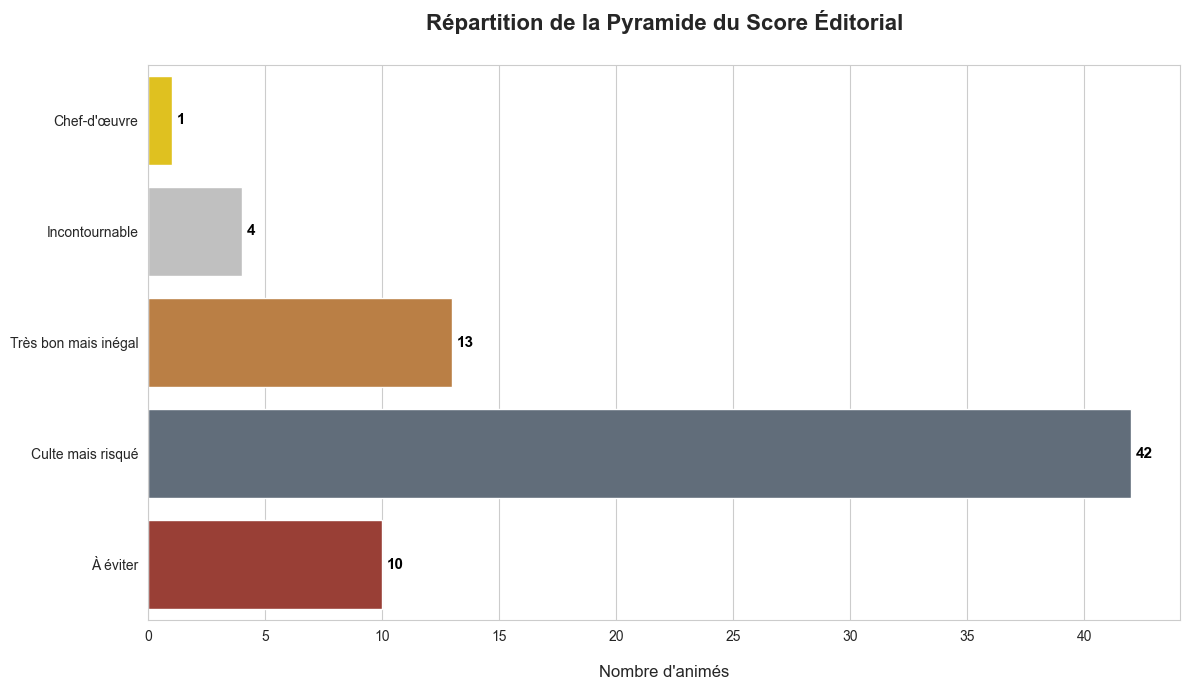

In [402]:


# 1. Sécurité
paliers = [0, 7.5, 8.5, 8.9, 9.2, 10.1] 
noms_labels = ["À éviter", "Culte mais risqué", "Très bon mais inégal", "Incontournable", "Chef-d'œuvre"]

df['Verdict_Editorial'] = pd.cut(df['Score_Editorial'], bins=paliers, labels=noms_labels, right=False)

# 2. Données pour graphique
stats = df['Verdict_Editorial'].value_counts().reindex(noms_labels[::-1]) 

# 3. Couleurs
couleurs = ['#FFD700', '#C0C0C0', '#CD7F32', '#5D6D7E', '#A93226'] 

# 4. Graphique
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

barplot = sns.barplot(x=stats.values, y=stats.index, palette=couleurs, hue=stats.index, legend=False)

# 5. Esthétique
plt.title('Répartition de la Pyramide du Score Éditorial', fontsize=16, pad=25, fontweight='bold')
plt.xlabel('Nombre d\'animés', fontsize=12, labelpad=15)
plt.ylabel('')

# Ajout des chiffres
for i, v in enumerate(stats.values):
    plt.text(v + 0.2, i, str(int(v)), color='black', va='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('pyramide_qualite.png') 
plt.show()

##### ---> Analyse de la Distribution : La Rareté comme Preuve

La visualisation confirme la pertinence desseuils de segmentation :

* **L'Effet Pyramide :** On observe que les catégories **"Incontournable"** et **"Très bon mais inégal"** forment le cœur de notre sélection. C'est le signe d'un dataset réparti sans anomalies.

* **L'Exclusivité :** La catégorie **"Chef-d'œuvre"** ne contient que Frieren. Cette rareté est volontaire : elle garantit que le label conserve toute sa valeur.

* **Le Rôle de Filtre :** La présence d'œuvres dans **"À éviter"** (malgré des notes initiales correctes sur les sites de fans) prouve que l'exigence technique sur la régularité fonctionne comme un véritable filtre.

<br>

<hr style="width:15%; margin-left: 0;">

#### 5.3 Validation des Hypothèses H3 et H4

Maintenant que notre système de segmentation est en place, nous pouvons confronter nos résultats aux hypothèses initiales de notre étude.


##### Hypothèse H3 : Un score composite simple
*"Un score composite simple peut mieux refléter la qualité réelle qu'une note brute issue d'un agrégat."*

**Verdict -> Validée** : L'analyse a démontré que la note globale a tendance à lisser, voire à masquer, les disparités techniques internes d'une œuvre.

- Le facteur "Stabilité" : Là où la note brute traite l'animé comme un bloc entier, le score composite intègre la régularité des épisodes.

- Preuve par l'écart : Un animé comme Fullmetal Alchemist: Brotherhood affiche une note de 9.1 mais subit une correction à 8.77. Cette baisse n'est pas un jugement de valeur, mais la traduction mathématique d'un écart brut plus important

- Conclusion : Ce score récompense la constance. Il permet de distinguer les animés qui maintiennent leur qualité du début à la fin de ceux qui ont des "trous" techniques que la note globale ne montre pas.

<br>

<hr style="width:7%; margin-left: 0;">

##### Hypothèse H3 : Ce score permet une décision robuste
*"Pour la mise en avant éditoriale.."*

**Verdict -> Validée** : La segmentation par labels transforme une suite de chiffres en une stratégie de recommandation objective.

- Standardisation : La décision de mise en avant ne repose plus sur une appréciation subjective, mais sur le franchissement de paliers de performance calculés.

- Fiabilité du Verdict : Le système permet de justifier pourquoi un titre est "Incontournable" plutôt que "Chef-d'œuvre" en s'appuyant sur des métriques précises (Régularité + Studio). Cela rend la ligne éditoriale reproductible.

<br>

##### Bilan :

Les résultats prouvent qu'en combinant la stabilité des épisodes, le prestige du studio et une segmentation plus stricte dû à la générosité des notes globales initiales, on obtient une évaluation bien plus juste de la qualité. 

On dépasse le simple vote de popularité pour entrer dans une véritable sélection technique de précision.

<br>

<hr style="width:15%; margin-left: 0;">


#### 5.4 Notes Méthodologiques et Recommandations

##### 5.4.1 Notes contextuelles

Pour une lecture éclairée de ce classement, deux facteurs contextuels doivent être pris en compte. 

##### Avertissement sur le Statut des Œuvres
Environ 33 % du catalogue analysé est composé d'œuvres en cours de diffusion.

- Note Provisoire : Contrairement aux séries terminées, ces scores sont par définition non fixes. Une baisse soudaine de qualité technique ou une fin décevante pourrait faire chuter la régularité et le score final.

Recommandation : Ce classement doit être considéré comme un "instantané" de la performance actuelle pour ces titres.

<br>

- Note sur le facteur temporel de publication H5
L'idée d'un biais de "Hype" pour les œuvres récentes n'est pas confirmée par les chiffres. 

Au contraire, les classiques survivent. Faute de données historiques suffisantes pour trancher, le score reste neutre et ne favorise aucune époque.

<br>

<hr style="width:15%; margin-left: 0;">

##### 5.4.2 Recommandation Éditoriale : La Stratégie de recommandation similaire

- L'objectif est d'accompagner le curateur humain dans la sécurisation de sa ligne éditoriale. Lorsqu'un titre phare est mis en avant, il est stratégique de l'associer à une référence stable du même genre pour garantir la satisfaction de l'utilisateur.

**Critères d'une "Valeur Sûre"**

Pour qu'une recommandation soit considérée comme robuste, elle doit valider trois points :

- Affinité de Genre : Appartenir à la même catégorie que le titre phare.

- Excellence Technique : Score Éditorial adapté (Catégories Chef-d'œuvre ou Incontournable).

- Régularité : Un faible écart-type, garantissant l'absence d'irégularité.

**Guide d'orientation**

- Sécurisation de bannière : Ne jamais laisser un titre à score volatil seul en tête d'affiche. L'accompagner d'une valeur sûre permet de crédibiliser l'expertise de la plateforme.

- Fidélisation : Si un utilisateur termine une œuvre "Très bonne mais inégale", le diriger immédiatement vers l'Incontournable du même genre pour transformer son intérêt en fidélité durable.

# Dashboard synthéthique du dossier

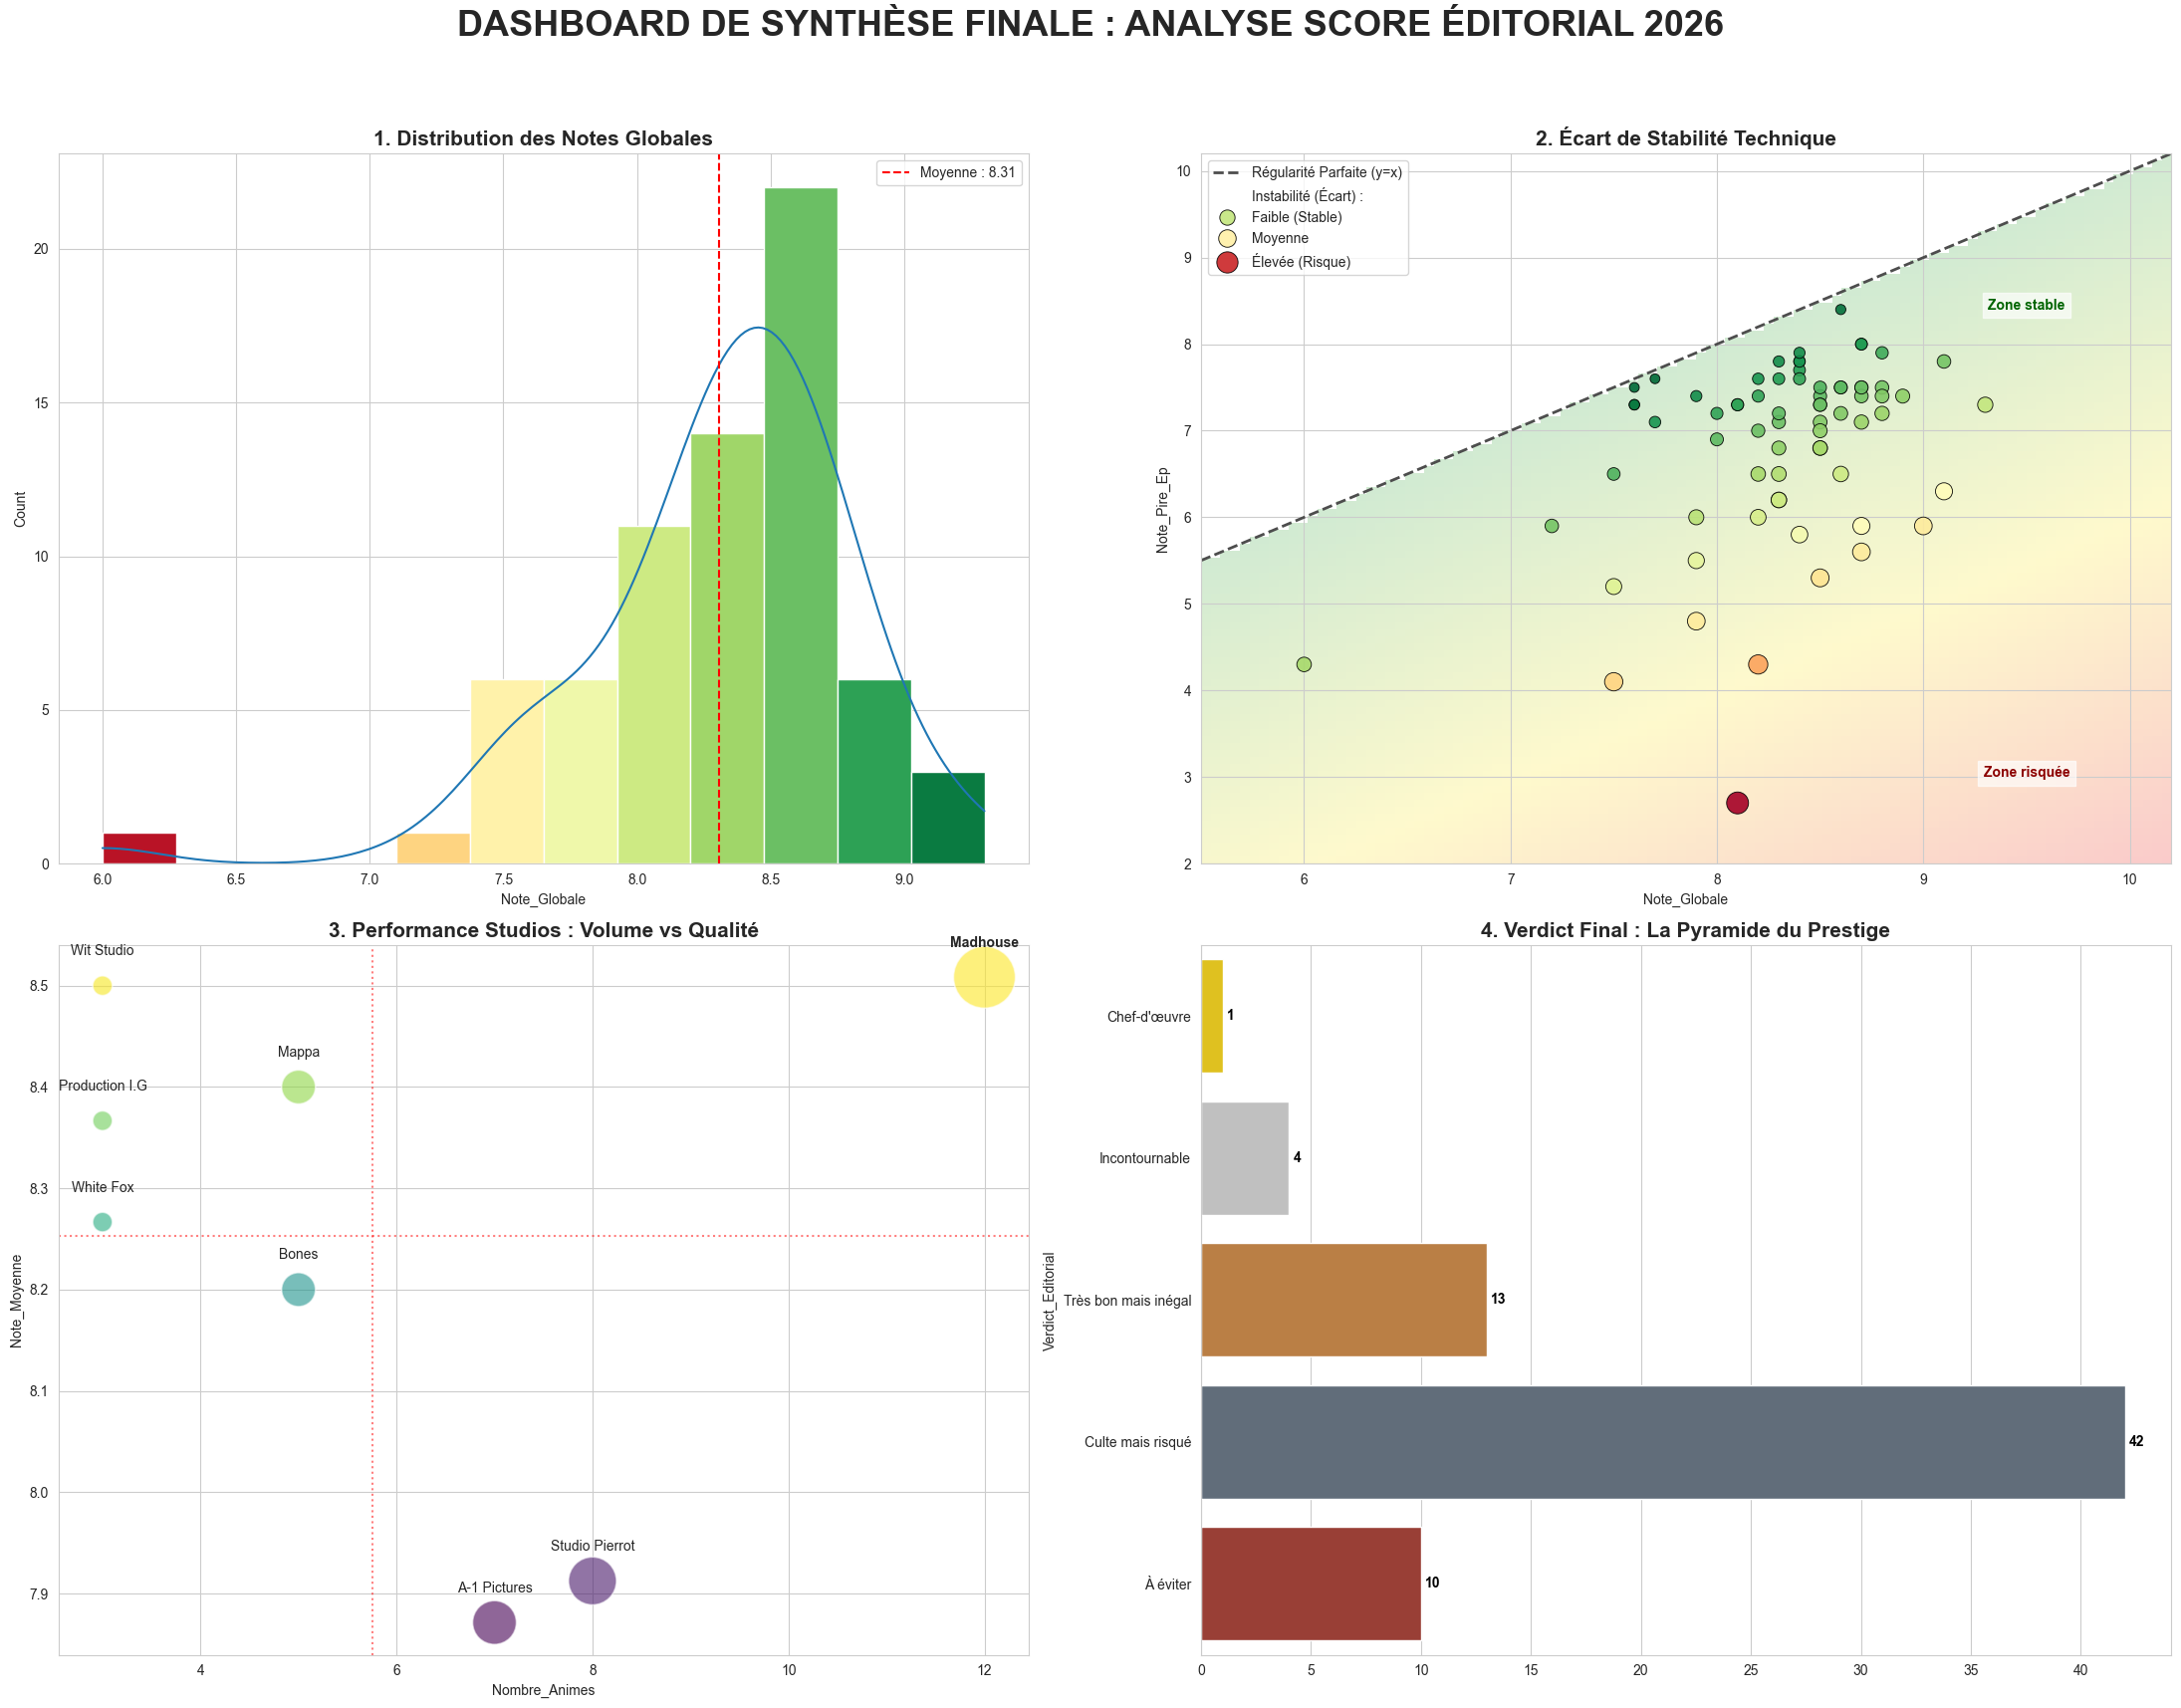

In [403]:

# --- PRÉPARATION PRÉALABLE (Studios) ---
df_studios = df.copy()
def clean_and_split_studios(text):
    if not isinstance(text, str): return []
    text = text.lower().replace(',', '/').replace(' & ', '/').replace(' and ', '/').replace(' + ', '/').replace(';', '/')
    return [p.strip().title() for p in text.split('/') if p.strip() != '']

df_studios['Studio'] = df_studios['Studio'].apply(clean_and_split_studios)
df_studios = df_studios.explode('Studio')
studio_stats = df_studios.groupby('Studio').agg(Nombre_Animes=('Note_Globale', 'count'), Note_Moyenne=('Note_Globale', 'mean')).reset_index()
df_bubble = studio_stats[studio_stats['Nombre_Animes'] >= 3]

# --- CONFIGURATION FIG ---
fig = plt.figure(figsize=(22, 18))
fig.suptitle("DASHBOARD DE SYNTHÈSE FINALE : ANALYSE SCORE ÉDITORIAL 2026", fontsize=26, fontweight='bold', y=0.98)

# --- 1. DISTRIBUTION DES NOTES (Haut Gauche) ---
plt.subplot(2, 2, 1)
ax1 = sns.histplot(data=df, x='Note_Globale', kde=True, bins=12)
norm = Normalize(vmin=df['Note_Globale'].min(), vmax=df['Note_Globale'].max())
cmap = plt.get_cmap('RdYlGn')
for patch in ax1.patches:
    patch.set_facecolor(cmap(norm(patch.get_x() + patch.get_width() / 2)))
plt.axvline(df['Note_Globale'].mean(), color='red', linestyle='--', label=f"Moyenne : {df['Note_Globale'].mean():.2f}")
plt.title('1. Distribution des Notes Globales', fontsize=15, fontweight='bold')
plt.legend()

# --- 2. ANALYSE DE LA STABILITÉ (Haut Droite) ---
plt.subplot(2, 2, 2)
x_min, x_max, y_min, y_max = 5.5, 10.2, 2.0, 10.2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z_masked = np.ma.masked_where((xx - yy) < 0, (xx - yy))
cmap_risk = mcolors.LinearSegmentedColormap.from_list("", ["#66bb6a", "#ffee58", "#ef5350"])
plt.imshow(Z_masked, extent=(x_min, x_max, y_min, y_max), origin='lower', cmap=cmap_risk, alpha=0.3, aspect='auto')

line_reg, = plt.plot([x_min, x_max], [x_min, x_max], ls="--", c=".3", linewidth=2)
ecart_temp = df['Note_Globale'] - df['Note_Pire_Ep']
scatter2 = sns.scatterplot(data=df, x='Note_Globale', y='Note_Pire_Ep', hue=ecart_temp, palette='RdYlGn_r', size=ecart_temp, sizes=(50, 250), alpha=0.9, edgecolor='black')

# Légende personnalisée 
handles2, labels2 = plt.gca().get_legend_handles_labels()
inv_patch = mpatches.Patch(color='none', label='Instabilité (Écart) :')
plt.legend([line_reg, inv_patch, handles2[1], handles2[len(handles2)//2], handles2[-1]], 
           ["Régularité Parfaite (y=x)", "Instabilité (Écart) :", "Faible (Stable)", "Moyenne", "Élevée (Risque)"], loc='upper left')

plt.text(9.5, 8.4, 'Zone stable', color='darkgreen', fontweight='bold', ha='center', backgroundcolor='#ffffffaa')
plt.text(9.5, 3.0, 'Zone risquée', color='darkred', fontweight='bold', ha='center', backgroundcolor='#ffffffaa')
plt.title('2. Écart de Stabilité Technique', fontsize=15, fontweight='bold')

# --- 3. PERFORMANCE DES STUDIOS (Bas Gauche) ---
plt.subplot(2, 2, 3)
sns.scatterplot(data=df_bubble, x='Nombre_Animes', y='Note_Moyenne', size='Nombre_Animes', sizes=(200, 2000), hue='Note_Moyenne', palette='viridis', alpha=0.6, legend=False)
plt.axvline(df_bubble['Nombre_Animes'].mean(), color='red', linestyle=':', alpha=0.5)
plt.axhline(df_bubble['Note_Moyenne'].mean(), color='red', linestyle=':', alpha=0.5)

# Annotation des labels 
labels_to_show = set(df_bubble.nlargest(8, 'Nombre_Animes')['Studio'].tolist() + df_bubble.nlargest(5, 'Note_Moyenne')['Studio'].tolist() + ['Wit Studio', 'Mappa'])
for i in range(df_bubble.shape[0]):
    row = df_bubble.iloc[i]
    if row['Studio'] in labels_to_show:
        plt.text(row['Nombre_Animes'], row['Note_Moyenne']+0.03, row['Studio'], fontsize=10, ha='center', weight=('bold' if row['Studio'] == 'Madhouse' else 'normal'))
plt.title('3. Performance Studios : Volume vs Qualité', fontsize=15, fontweight='bold')

# --- 4. RÉPARTITION FINALE (Bas Droite) ---
plt.subplot(2, 2, 4)
stats = df['Verdict_Editorial'].value_counts().reindex(["Chef-d'œuvre", "Incontournable", "Très bon mais inégal", "Culte mais risqué", "À éviter"])
sns.barplot(x=stats.values, y=stats.index, palette=['#FFD700', '#C0C0C0', '#CD7F32', '#5D6D7E', '#A93226'], hue=stats.index, legend=False)
for i, v in enumerate(stats.values):
    plt.text(v + 0.2, i, str(int(v)), color='black', va='center', fontweight='bold')
plt.title('4. Verdict Final : La Pyramide du Prestige', fontsize=15, fontweight='bold')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

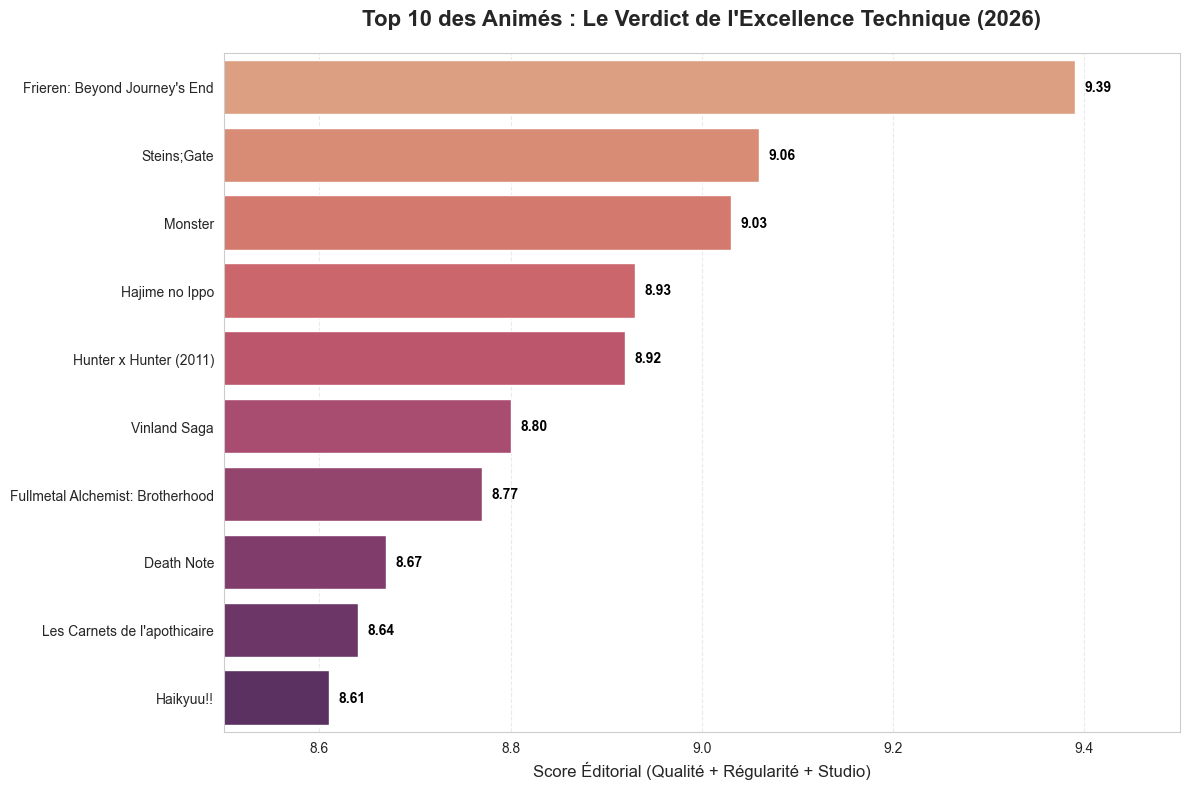

Graphique généré ET fichier CSV sauvegardé avec succès.


In [ ]:
# --- LE VERDICT FINAL : TOP 10 ÉDITORIAL ---
plt.figure(figsize=(12, 8))


top_10_final = df.sort_values('Score_Editorial', ascending=False).head(10)

sns.barplot(
    data=top_10_final, 
    x='Score_Editorial', 
    y='Anime', 
    palette='flare', 
    hue='Anime', 
    legend=False
)

plt.xlim(8.5, 9.5)

for i, v in enumerate(top_10_final['Score_Editorial']):
    plt.text(v + 0.01, i, f"{v:.2f}", color='black', va='center', fontweight='bold')

plt.title('Top 10 des Animés : Le Verdict de l\'Excellence Technique (2026)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Score Éditorial (Qualité + Régularité + Studio)', fontsize=12)
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()



In [ ]:
# TOP 10 FINAL
print("TOP 10 FINAL (SCORE ÉDITORIAL) :")
print(df.sort_values('Score_Editorial', ascending=False)[['Anime', 'Score_Editorial', 'Verdict_Editorial']].head(10))

# EXPORT
df.sort_values('Score_Editorial', ascending=False).to_csv('Classement_Expert_Anime_2026.csv', index=False)
print("\nFichier CSV sauvegardé.")

df_final = df.sort_values('Score_Editorial', ascending=False)
df_final.to_csv('Classement_Expert_Anime_Final_2026.csv', index=False)

TOP 10 FINAL (SCORE ÉDITORIAL) :
                               Anime  Score_Editorial     Verdict_Editorial
35     Frieren: Beyond Journey's End             9.39          Chef-d'œuvre
21                       Steins;Gate             9.06        Incontournable
44                           Monster             9.03        Incontournable
45                    Hajime no Ippo             8.93        Incontournable
19            Hunter x Hunter (2011)             8.92        Incontournable
53                      Vinland Saga             8.80  Très bon mais inégal
3   Fullmetal Alchemist: Brotherhood             8.77  Très bon mais inégal
18                        Death Note             8.67  Très bon mais inégal
13      Les Carnets de l'apothicaire             8.64  Très bon mais inégal
10                         Haikyuu!!             8.61  Très bon mais inégal

Fichier CSV sauvegardé.
